In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
from stanza.pipeline.external import spacy
from transformers import AutoTokenizer, AutoModel
import torch
import metrics
from analysis import open_questions_full_analysis, TAT_questions_full_analysis
import data_loading
import text_processing_utils
from data_loading import load_all_transcriptions
from text_processing_utils import extract_valid_answers, extract_content_words, clean_text, extract_content_words_without_PROPN

In [4]:
data_base_dir = r"C:\Users\elira\ShmilaJustSolveIt Dropbox\Eliran Shmila\PC\Documents\NLP\Final Project\data_from_beer_yaacov_2nd"
control_dir = os.path.join(data_base_dir, 'control', 'male')
patients_dir = os.path.join(data_base_dir, 'patients')

# Load all files from control and patients directories

control_transcriptions = load_all_transcriptions(control_dir)
patient_transcriptions = load_all_transcriptions(patients_dir)

print(f'Loaded {len(control_transcriptions)} control transcriptions.')
print(f'Loaded {len(patient_transcriptions)} patient transcriptions.')

Loaded 25 control transcriptions.
Loaded 19 patient transcriptions.


In [5]:
# Extract valid answers
control_valid_answers = extract_valid_answers(control_transcriptions)
patient_valid_answers = extract_valid_answers(patient_transcriptions)

**coherence is calculated by averaging cosine similarity in each k-sized windows in throughout the answer**

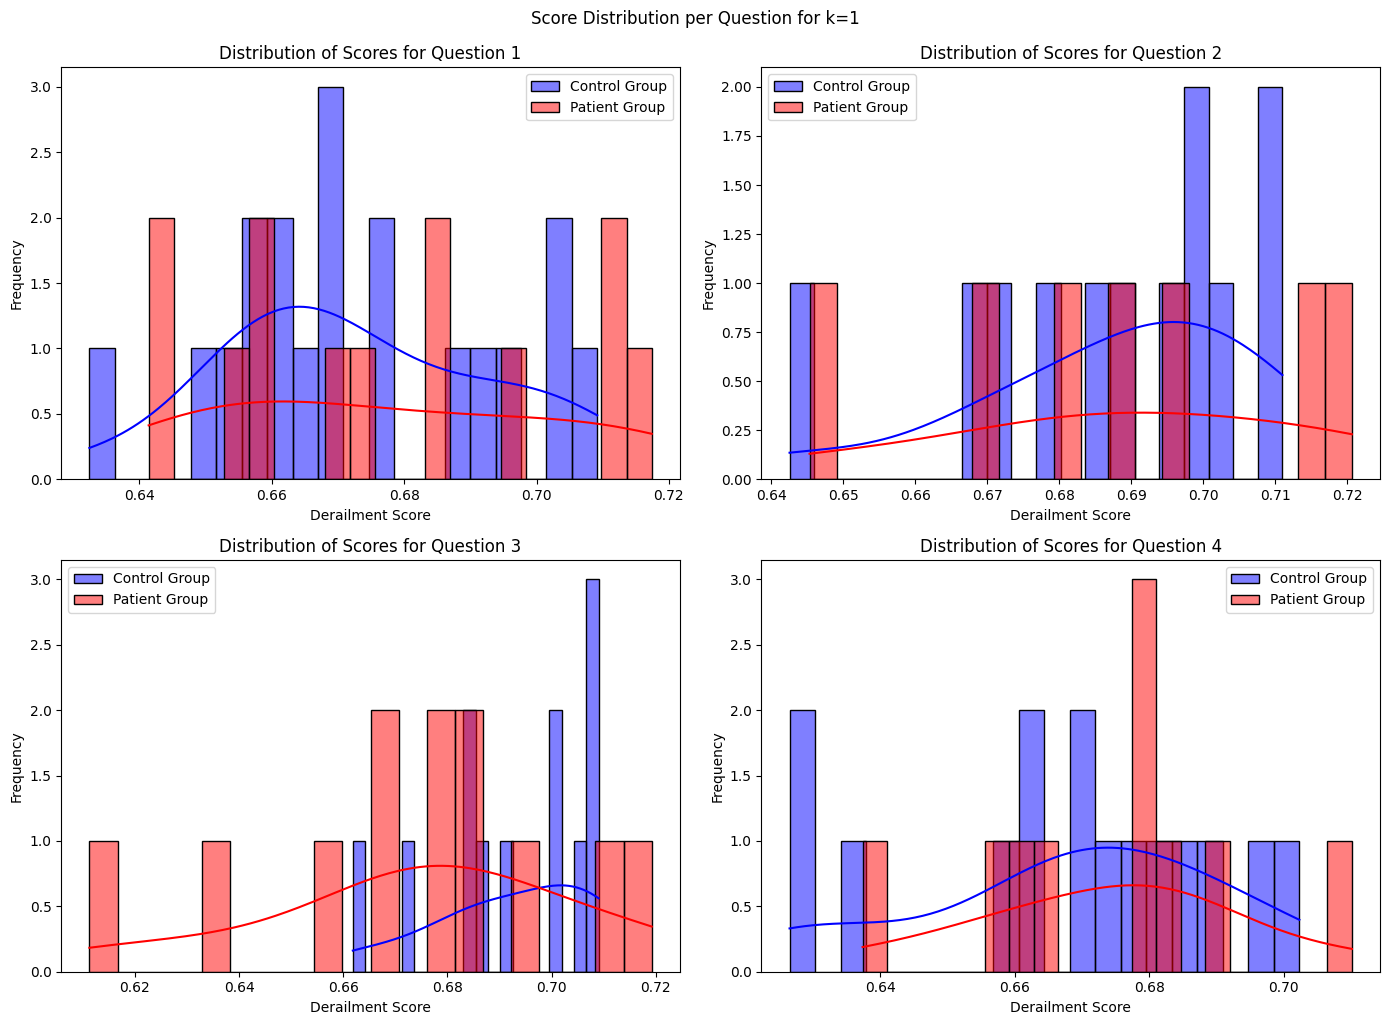

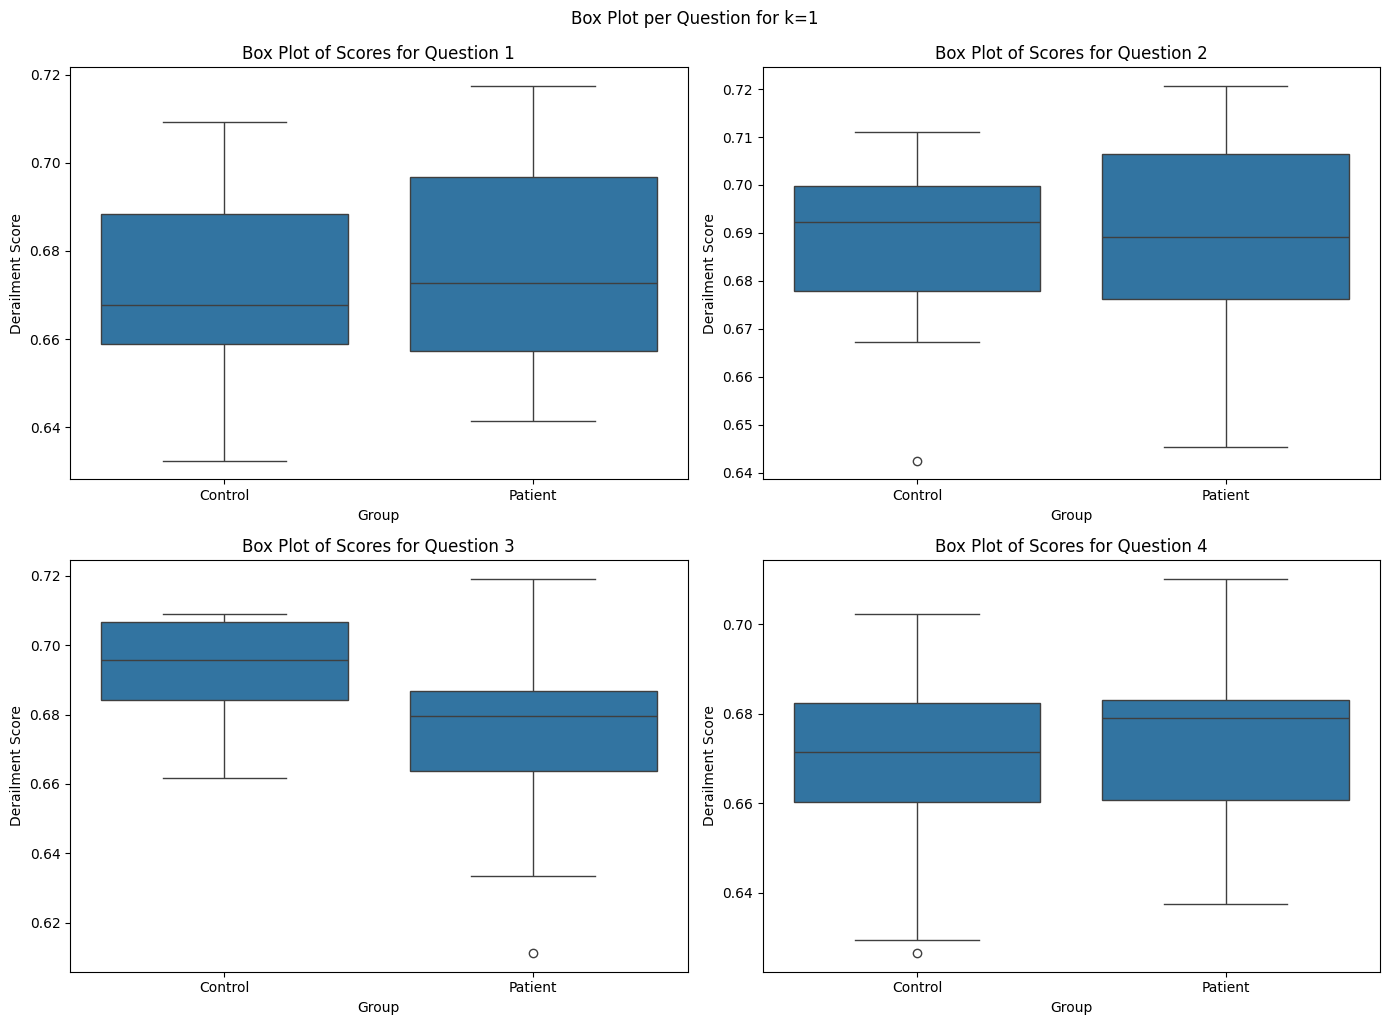

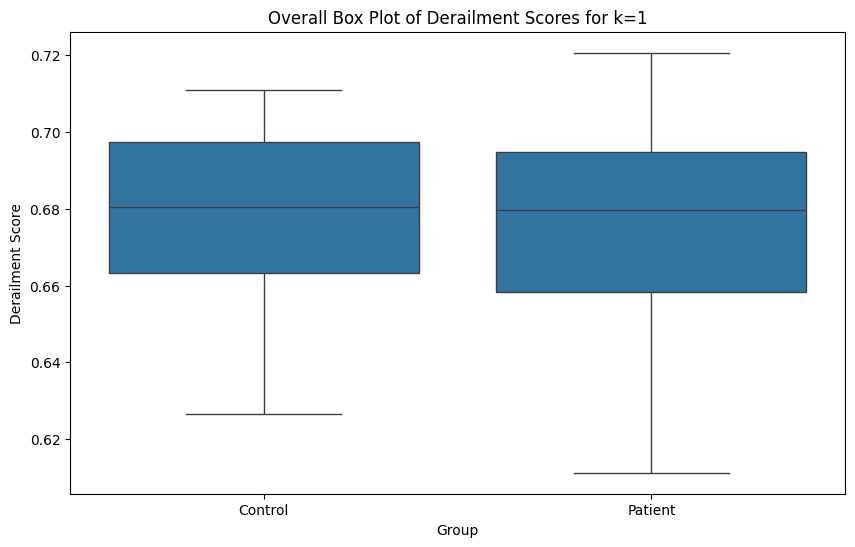

T-Test Results per Question for k=1:
Question 1: t-statistic = -0.567469810189237, p-value = 0.7126912713421554, control mean = 0.6728066205978394, patient mean = 0.6775004267692566
Question 2: t-statistic = -0.11036489396086427, p-value = 0.5432937788119339, control mean = 0.687450110912323, patient mean = 0.6886094212532043
Question 3: t-statistic = 1.8972666570266647, p-value = 0.03549803588199933, control mean = 0.6927609443664551, patient mean = 0.6740491986274719
Question 4: t-statistic = -0.7051663492072642, p-value = 0.7561063403040011, control mean = 0.6676560640335083, patient mean = 0.673952579498291

Overall T-Test Results for k=1: t-statistic = 0.23182483624632644, p-value = 0.408578726538453, control mean = 0.6786327362060547, patient mean = 0.6775211095809937

Welch's Test Results per Question for k=1:
Question 1: t-statistic = -0.5414808946113422, p-value = 0.7031427043170382
Question 2: t-statistic = -0.1022754046820531, p-value = 0.53972670120402
Question 3: t-statist

In [28]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=1, sliding_window=False)

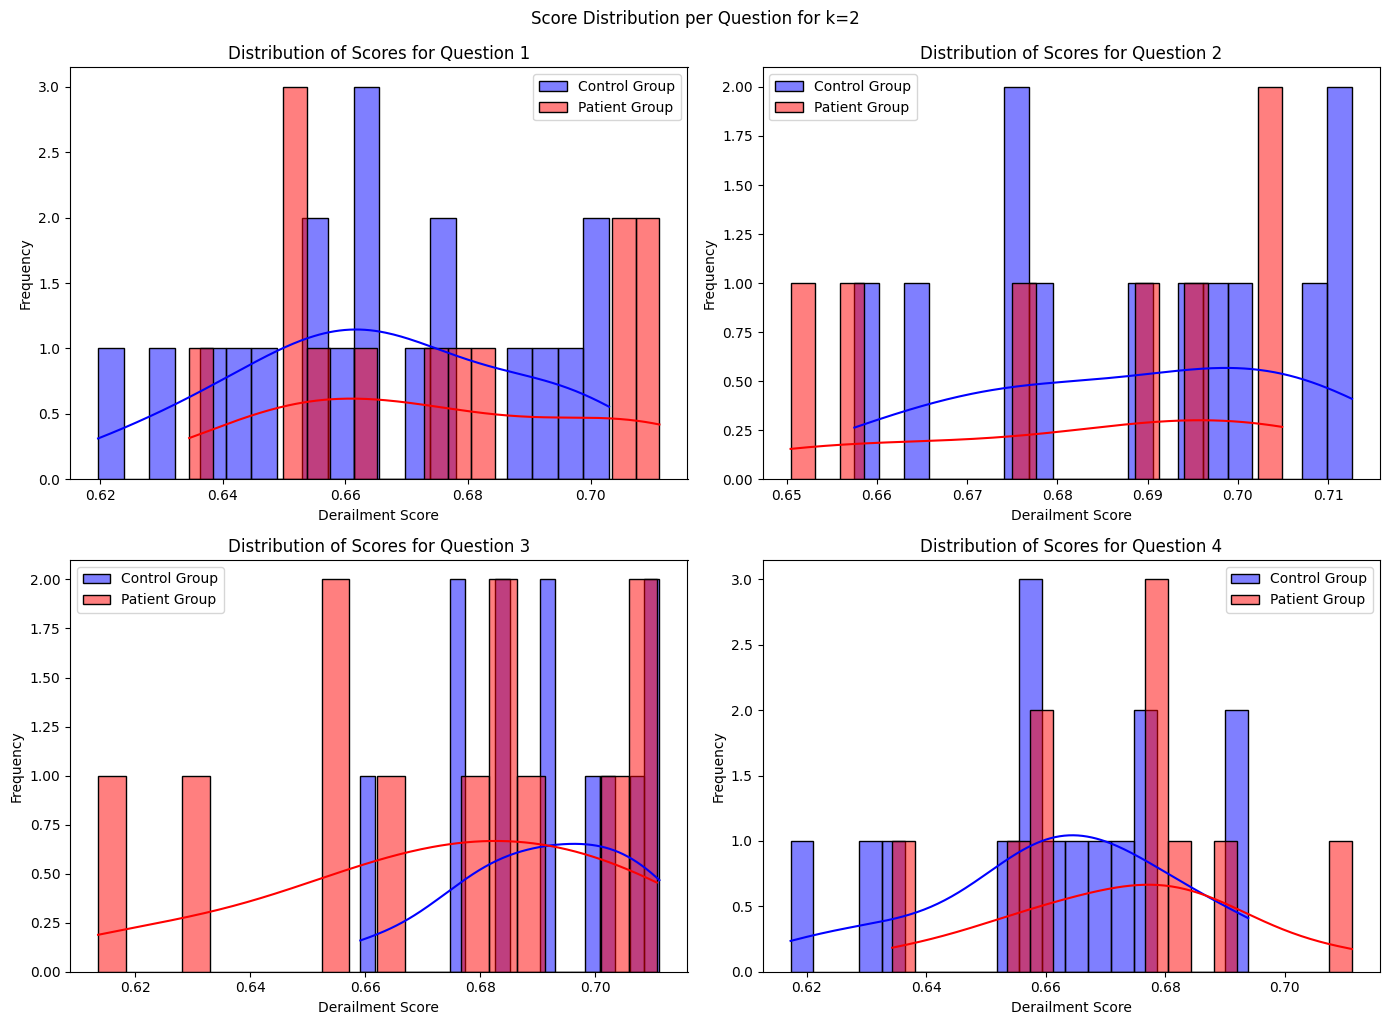

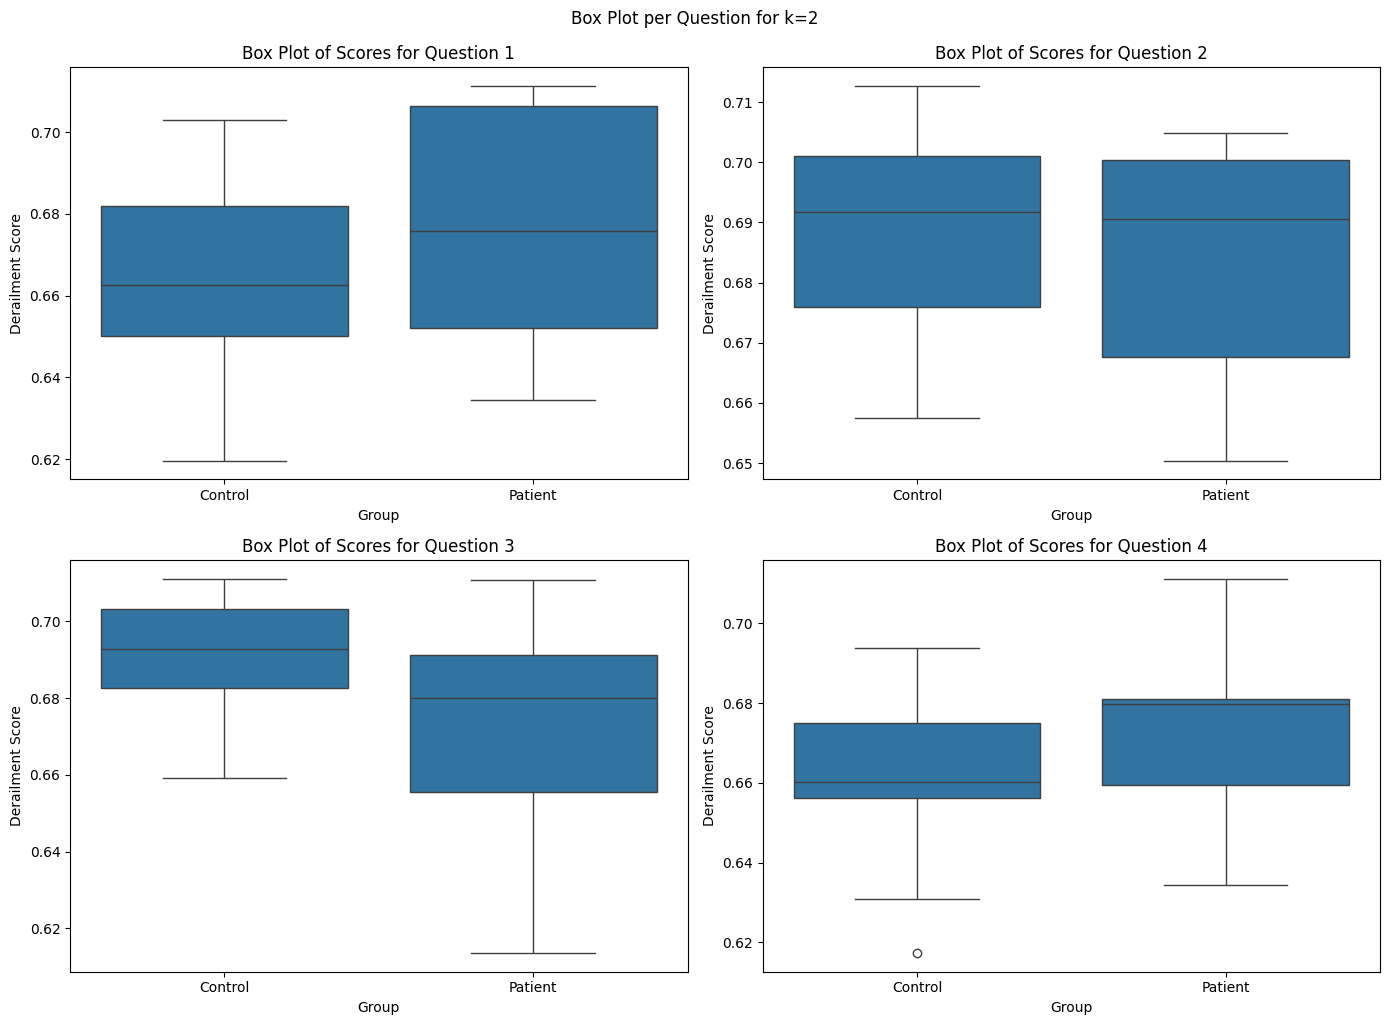

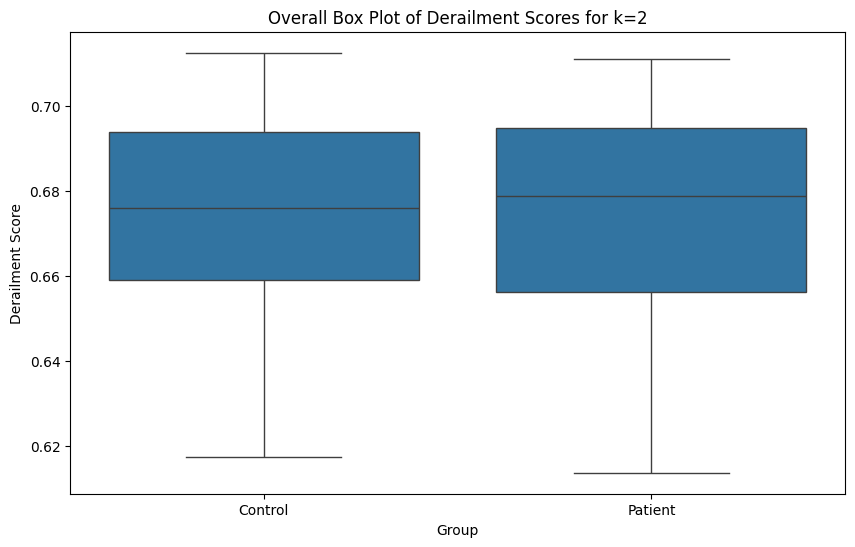

T-Test Results per Question for k=2:
Question 1: t-statistic = -1.1465417403145564, p-value = 0.8696830573807981, control mean = 0.665213942527771, patient mean = 0.6754170656204224
Question 2: t-statistic = 0.5546531531446375, p-value = 0.29317796170095867, control mean = 0.6882883906364441, patient mean = 0.683090090751648
Question 3: t-statistic = 1.84301890209142, p-value = 0.03942110880493118, control mean = 0.6912715435028076, patient mean = 0.6730565428733826
Question 4: t-statistic = -1.3579567466892386, p-value = 0.906174486752944, control mean = 0.6613842248916626, patient mean = 0.6731362342834473

Overall T-Test Results for k=2: t-statistic = -0.21997699922117428, p-value = 0.5868266769107761, control mean = 0.6743888258934021, patient mean = 0.675478458404541

Welch's Test Results per Question for k=2:
Question 1: t-statistic = -1.1254833298933462, p-value = 0.8642952935849256
Question 2: t-statistic = 0.5289711569278033, p-value = 0.3036799733090112
Question 3: t-statisti

In [29]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=2, sliding_window=False)

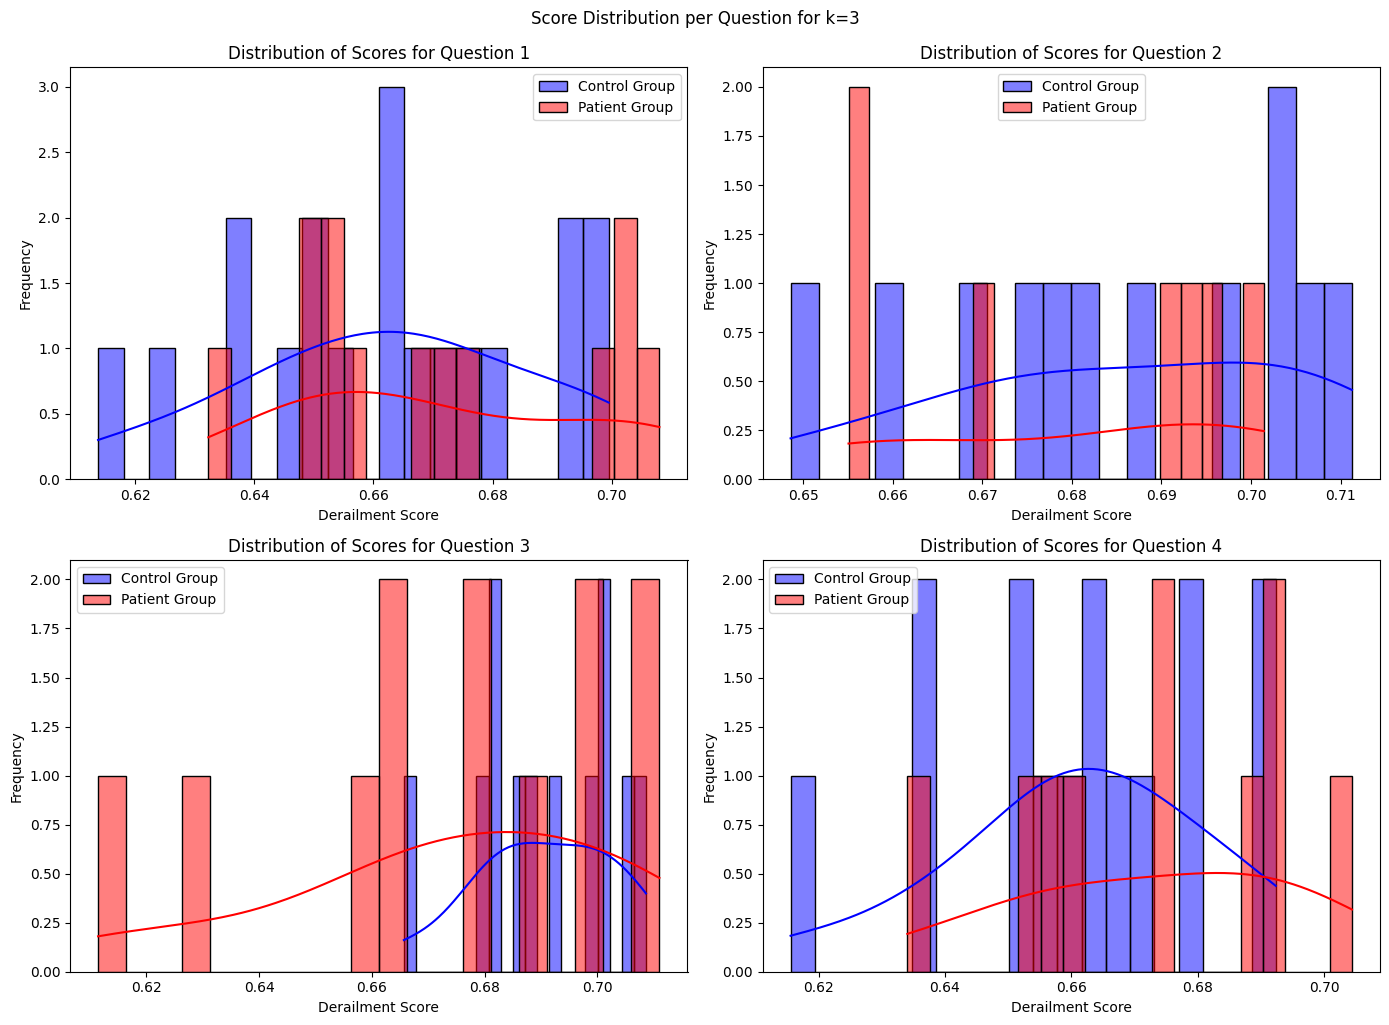

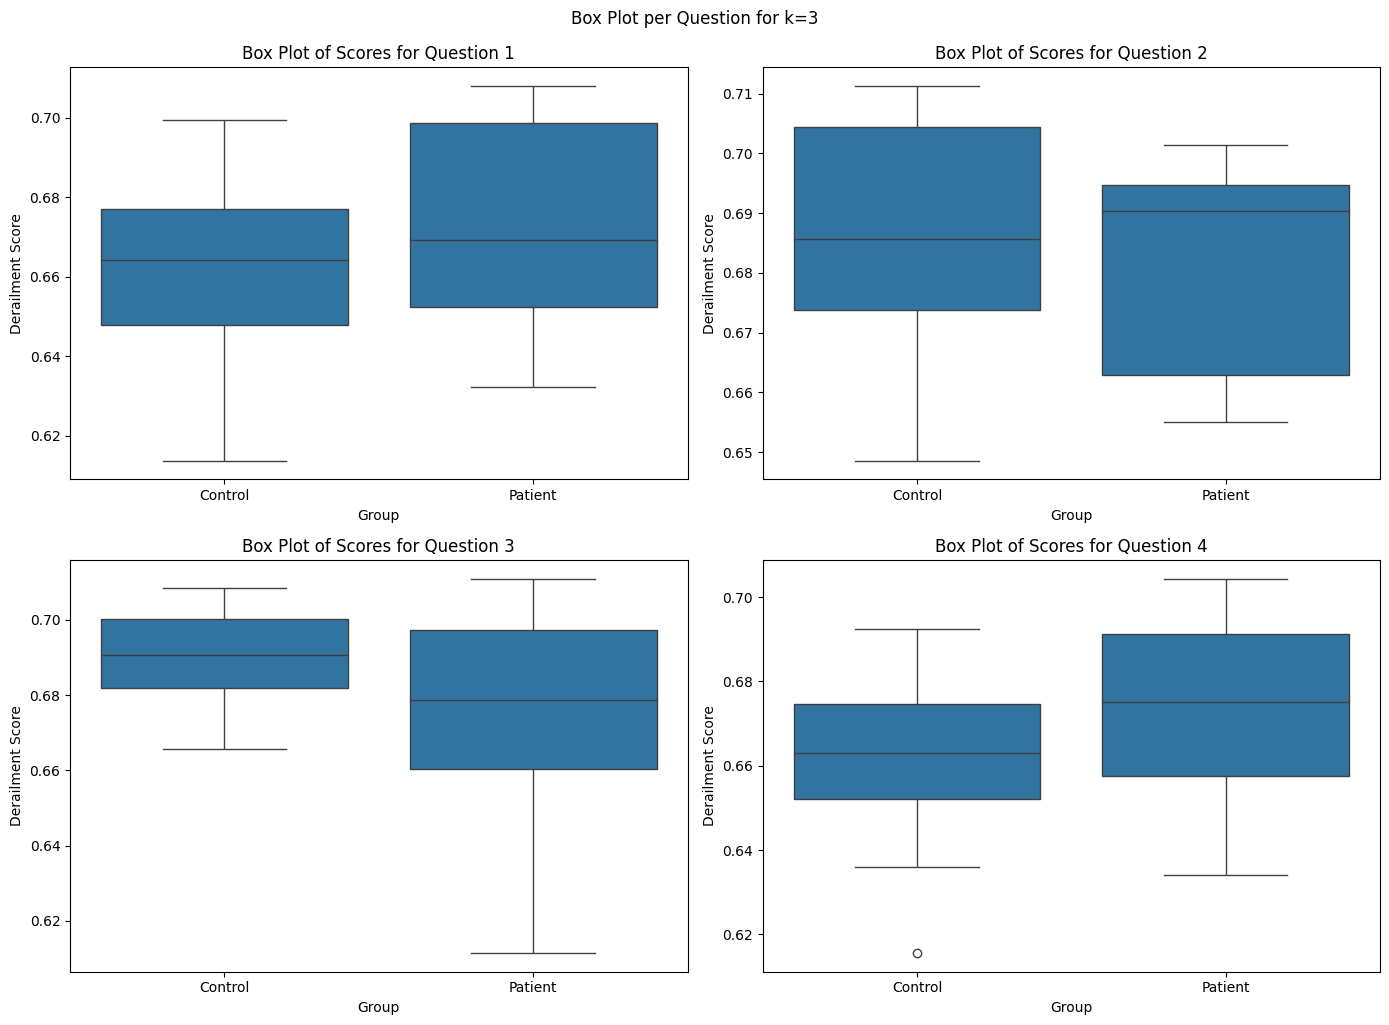

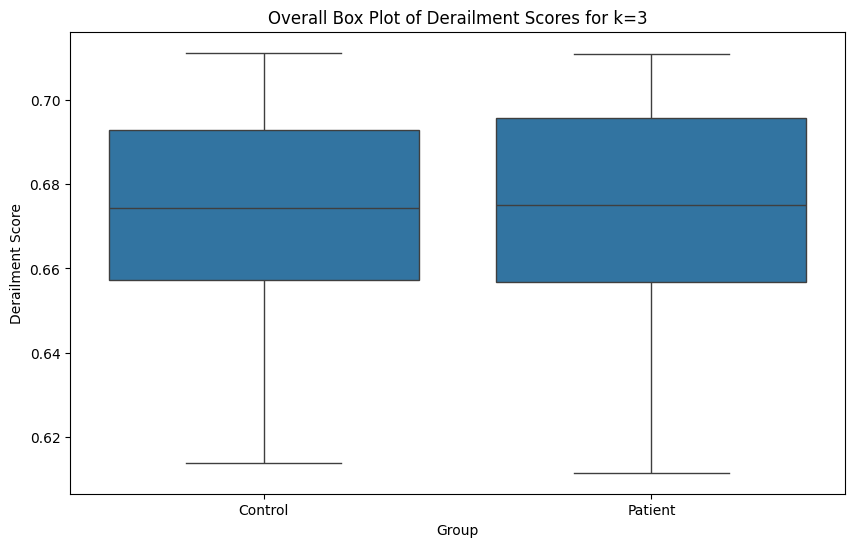

T-Test Results per Question for k=3:
Question 1: t-statistic = -0.988416966242989, p-value = 0.8345730383613272, control mean = 0.6624163389205933, patient mean = 0.6713117957115173
Question 2: t-statistic = 0.5489865408842822, p-value = 0.2950766679915915, control mean = 0.6855074763298035, patient mean = 0.6803365349769592
Question 3: t-statistic = 1.7904115754502548, p-value = 0.04358031948904071, control mean = 0.6906581521034241, patient mean = 0.6736473441123962
Question 4: t-statistic = -1.4218659181520008, p-value = 0.9157575761831734, control mean = 0.6607775092124939, patient mean = 0.6730862855911255

Overall T-Test Results for k=3: t-statistic = -0.2621264772874634, p-value = 0.6031129367929693, control mean = 0.6726131439208984, patient mean = 0.6739056706428528

Welch's Test Results per Question for k=3:
Question 1: t-statistic = -0.9857499569258065, p-value = 0.8332765808800529
Question 2: t-statistic = 0.5521952248840563, p-value = 0.29512224348773286
Question 3: t-stat

In [30]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=3, sliding_window=False)

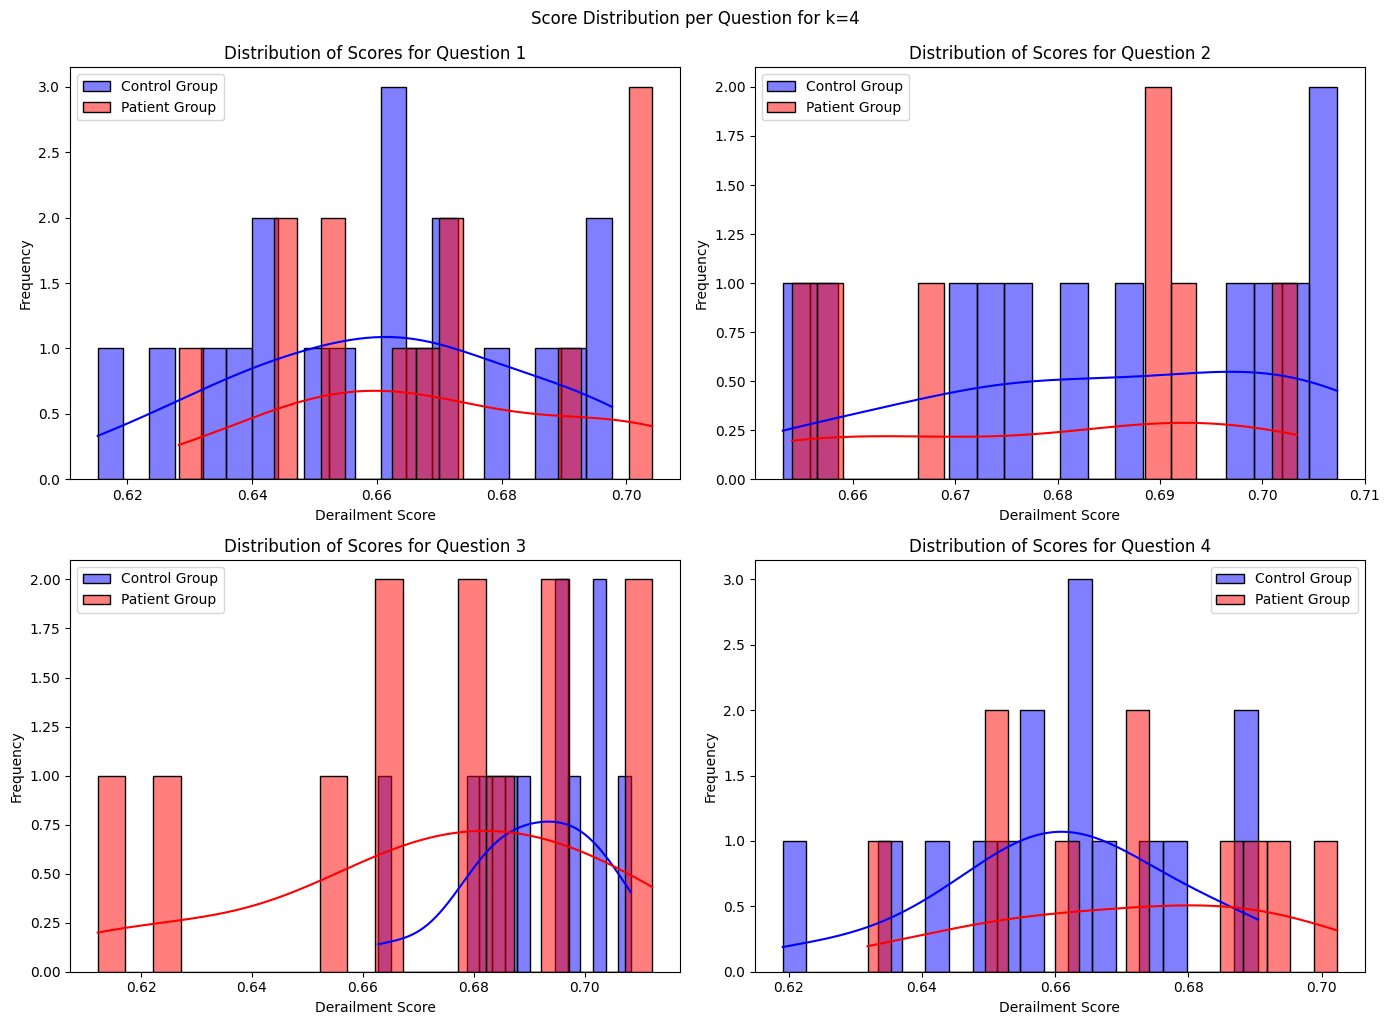

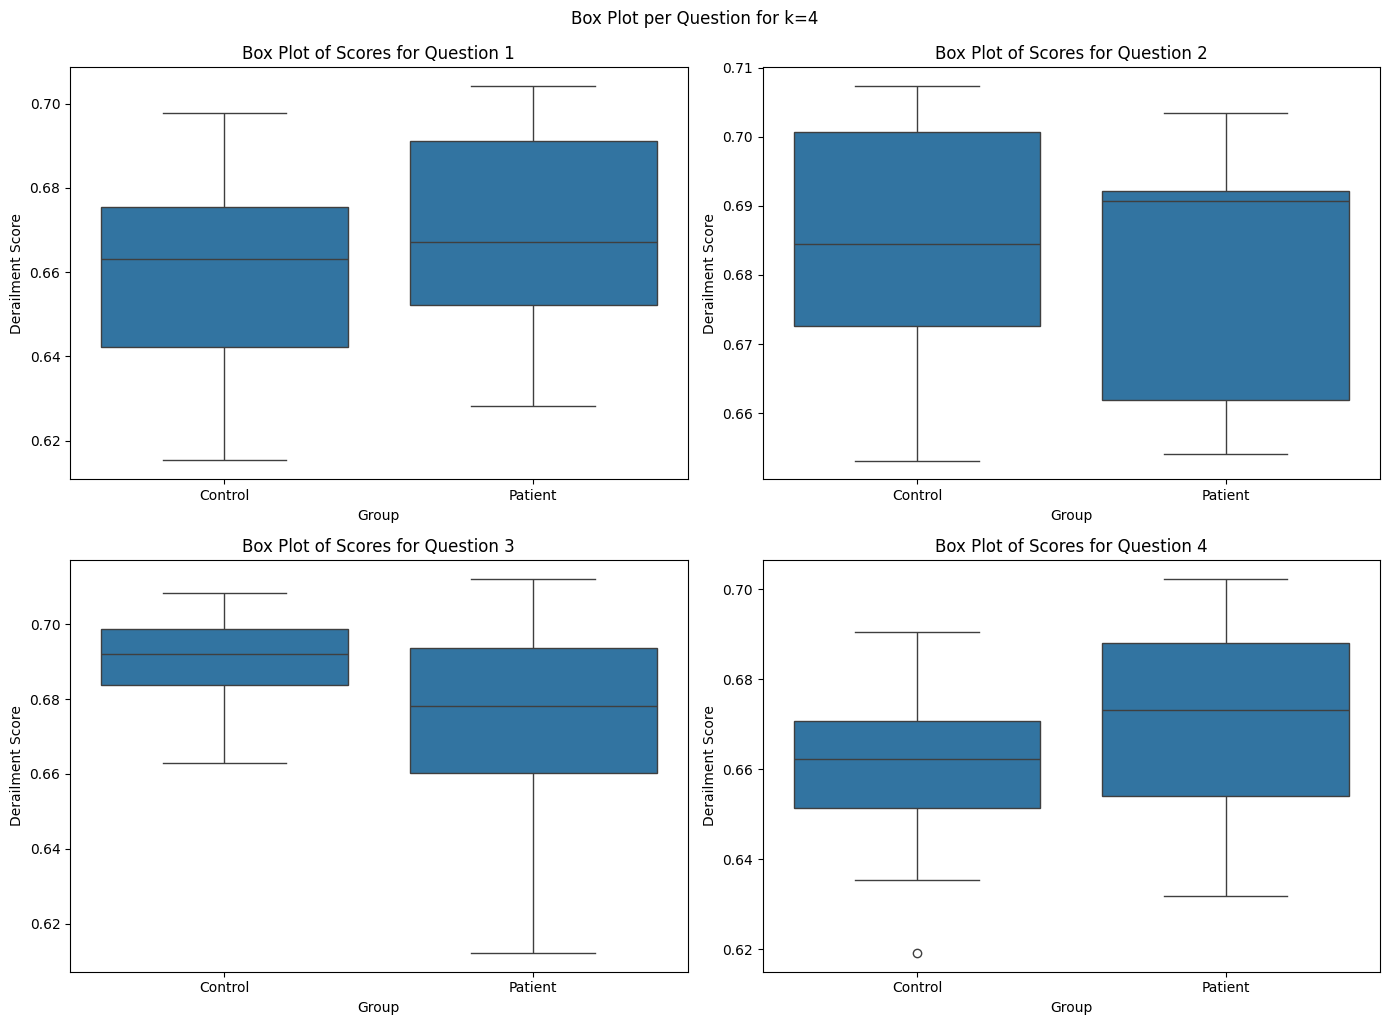

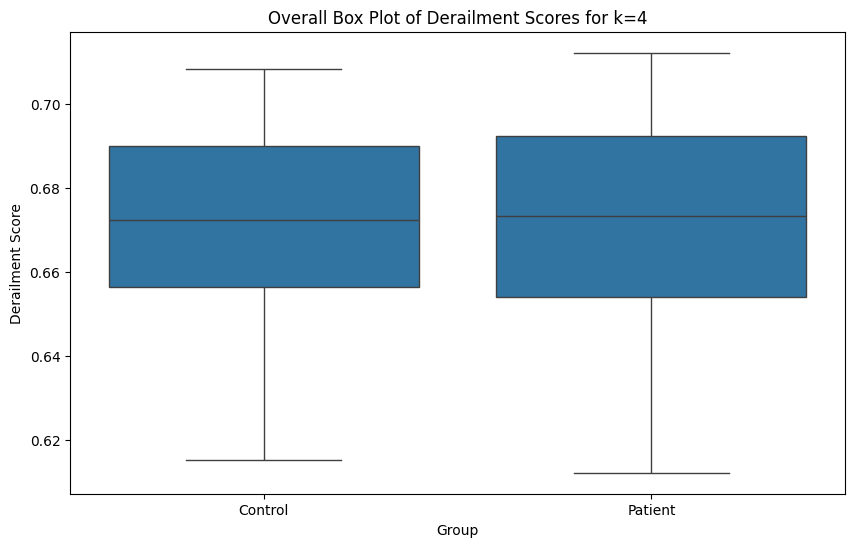

T-Test Results per Question for k=4:
Question 1: t-statistic = -1.0056389222891111, p-value = 0.8386839349384021, control mean = 0.6605598330497742, patient mean = 0.6693109273910522
Question 2: t-statistic = 0.5444838743257011, p-value = 0.29658976267709913, control mean = 0.684422492980957, patient mean = 0.6794990301132202
Question 3: t-statistic = 1.8822460498906455, p-value = 0.036548546377022144, control mean = 0.6904323101043701, patient mean = 0.6724861264228821
Question 4: t-statistic = -1.3103474801931174, p-value = 0.8984930345020176, control mean = 0.6601530909538269, patient mean = 0.6709913611412048

Overall T-Test Results for k=4: t-statistic = -0.15342351002289992, p-value = 0.5608101082200045, control mean = 0.6715722680091858, patient mean = 0.6723161935806274

Welch's Test Results per Question for k=4:
Question 1: t-statistic = -1.0026358103756041, p-value = 0.8373027748181074
Question 2: t-statistic = 0.5359172170320061, p-value = 0.30086967602963977
Question 3: t-s

In [31]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=4, sliding_window=False)

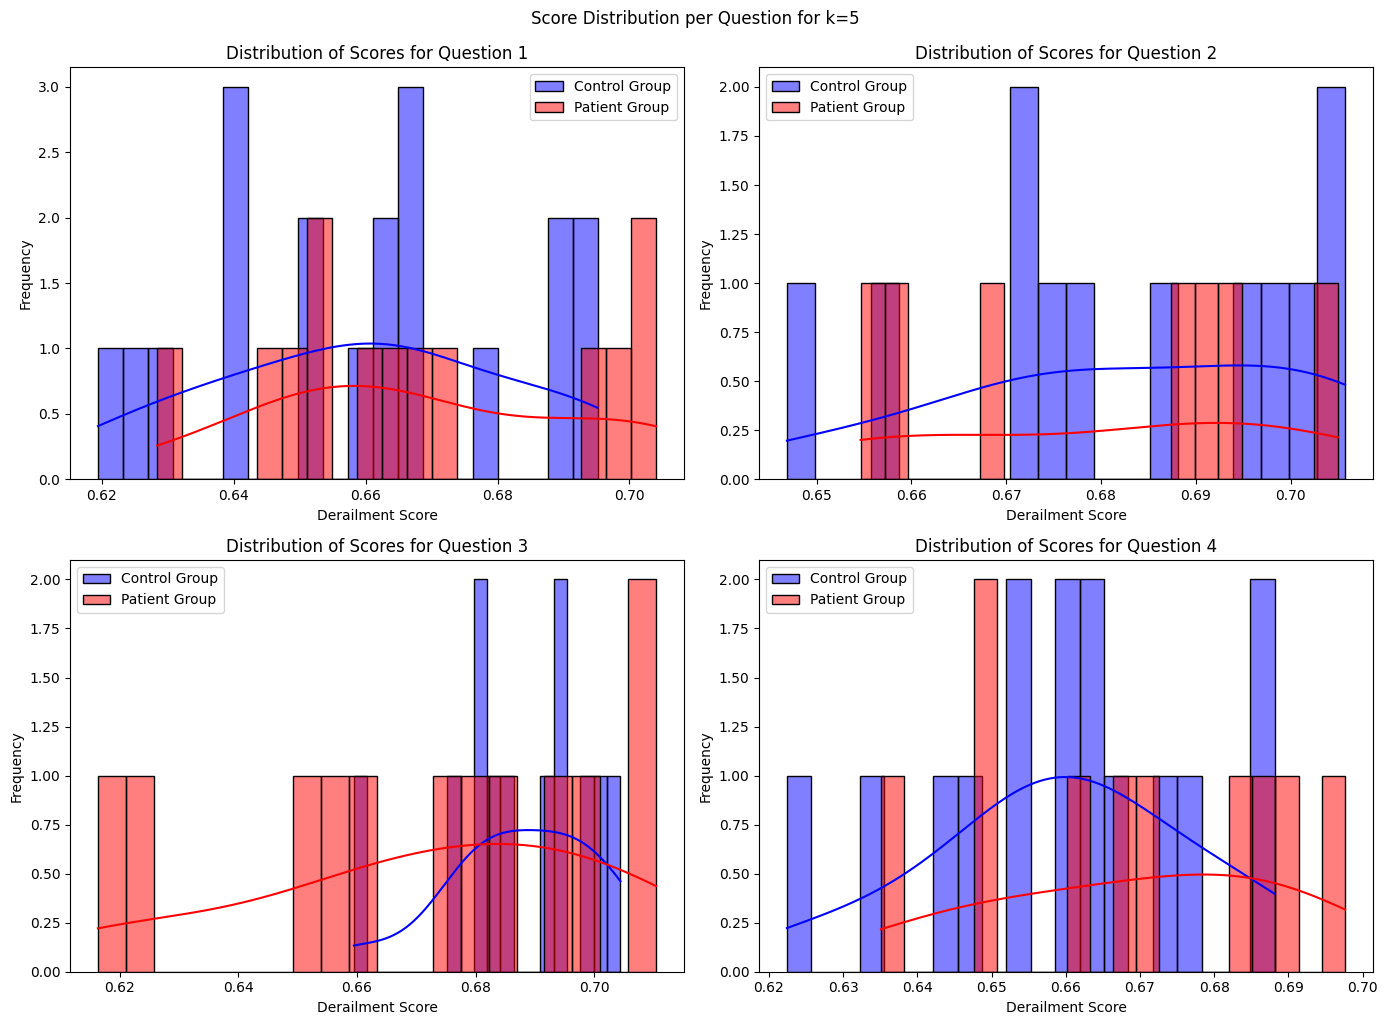

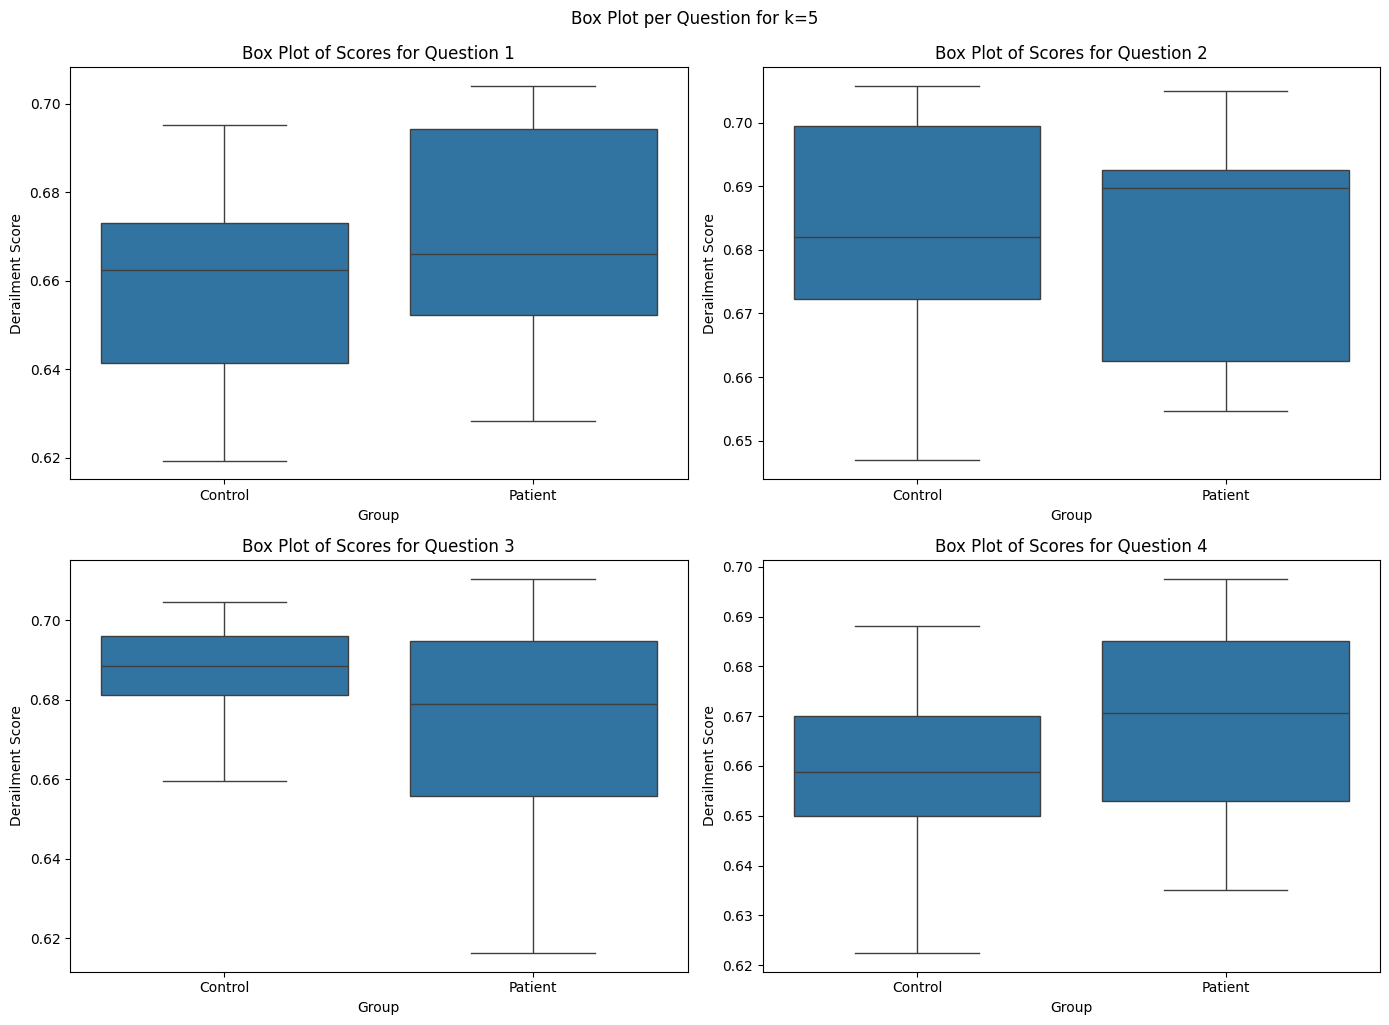

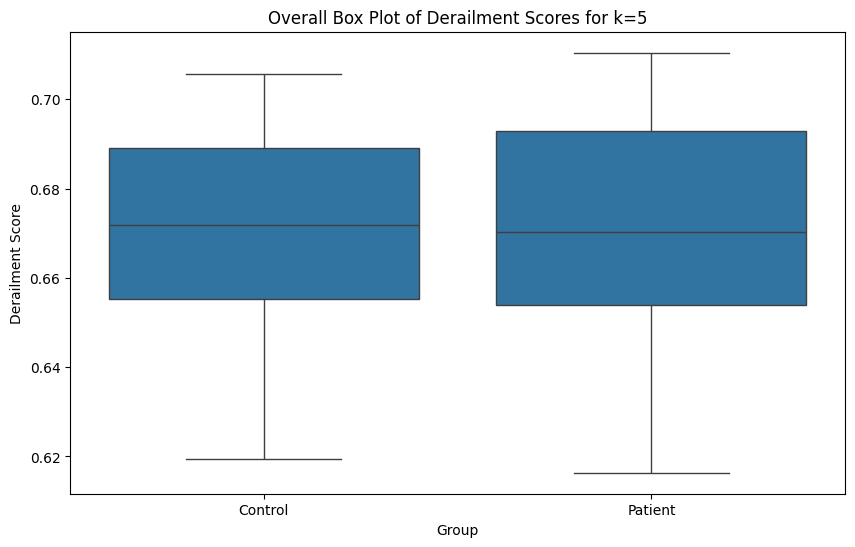

T-Test Results per Question for k=5:
Question 1: t-statistic = -1.0667689481764298, p-value = 0.852706906578972, control mean = 0.6597265601158142, patient mean = 0.6687393188476562
Question 2: t-statistic = 0.30156587055789724, p-value = 0.38332038509622346, control mean = 0.6827349066734314, patient mean = 0.6799567937850952
Question 3: t-statistic = 1.6409101770743169, p-value = 0.057518316111292885, control mean = 0.6875903010368347, patient mean = 0.6720287799835205
Question 4: t-statistic = -1.317665316605743, p-value = 0.8997045609863712, control mean = 0.659207284450531, patient mean = 0.6694111824035645

Overall T-Test Results for k=5: t-statistic = -0.33731859809593867, p-value = 0.6317009307521951, control mean = 0.6701176166534424, patient mean = 0.6717086434364319

Welch's Test Results per Question for k=5:
Question 1: t-statistic = -1.0592746022302846, p-value = 0.8502579894402337
Question 2: t-statistic = 0.2989138213766772, p-value = 0.38498817883574576
Question 3: t-st

In [32]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=5, sliding_window=False)

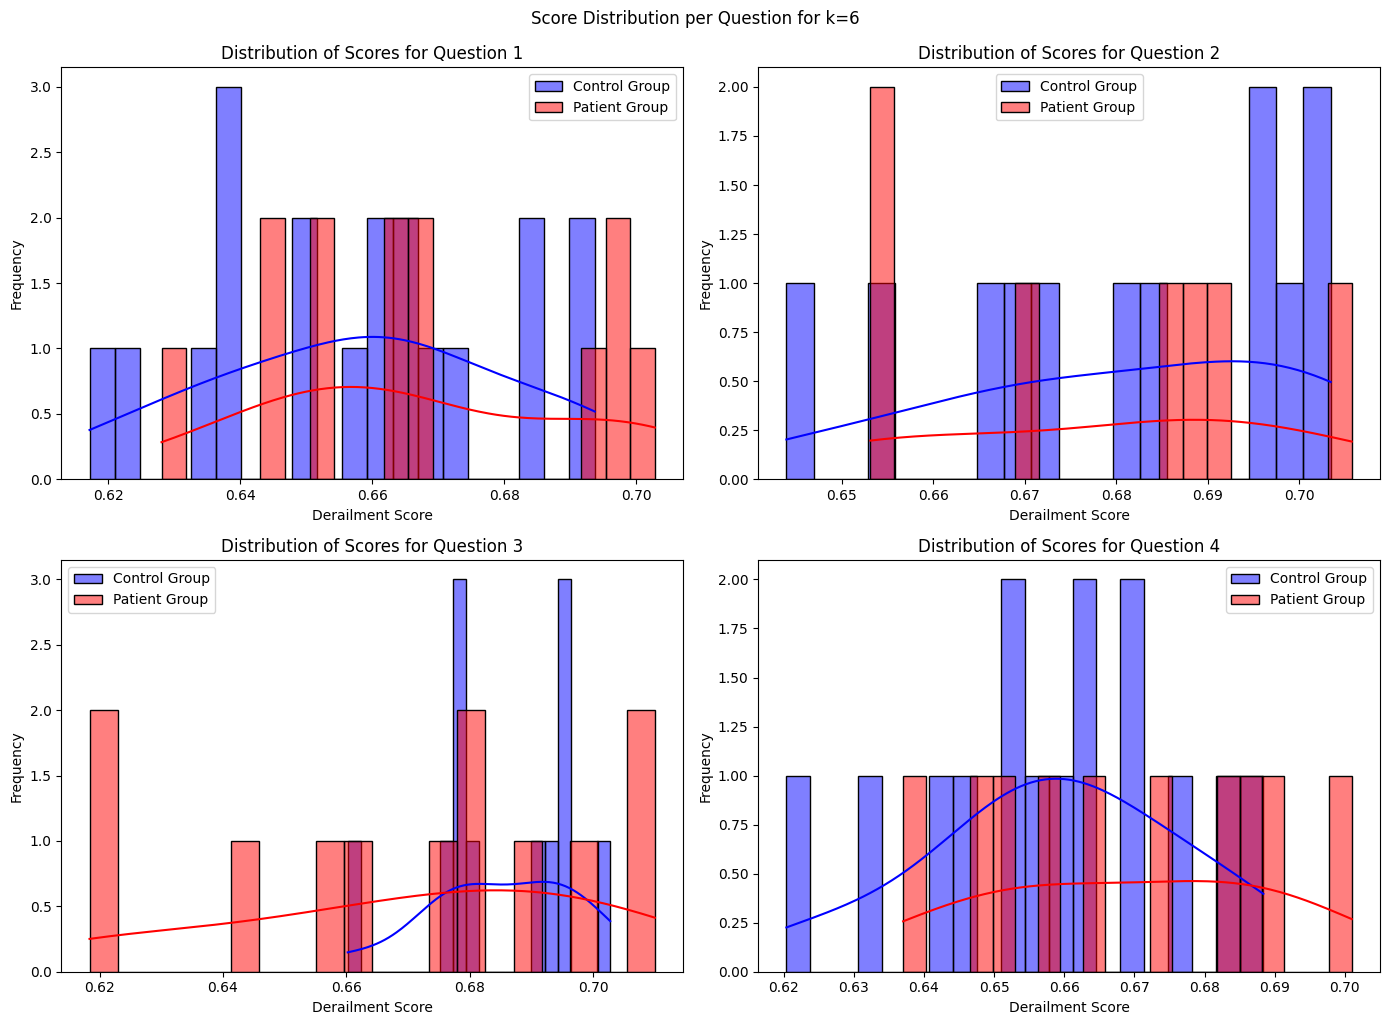

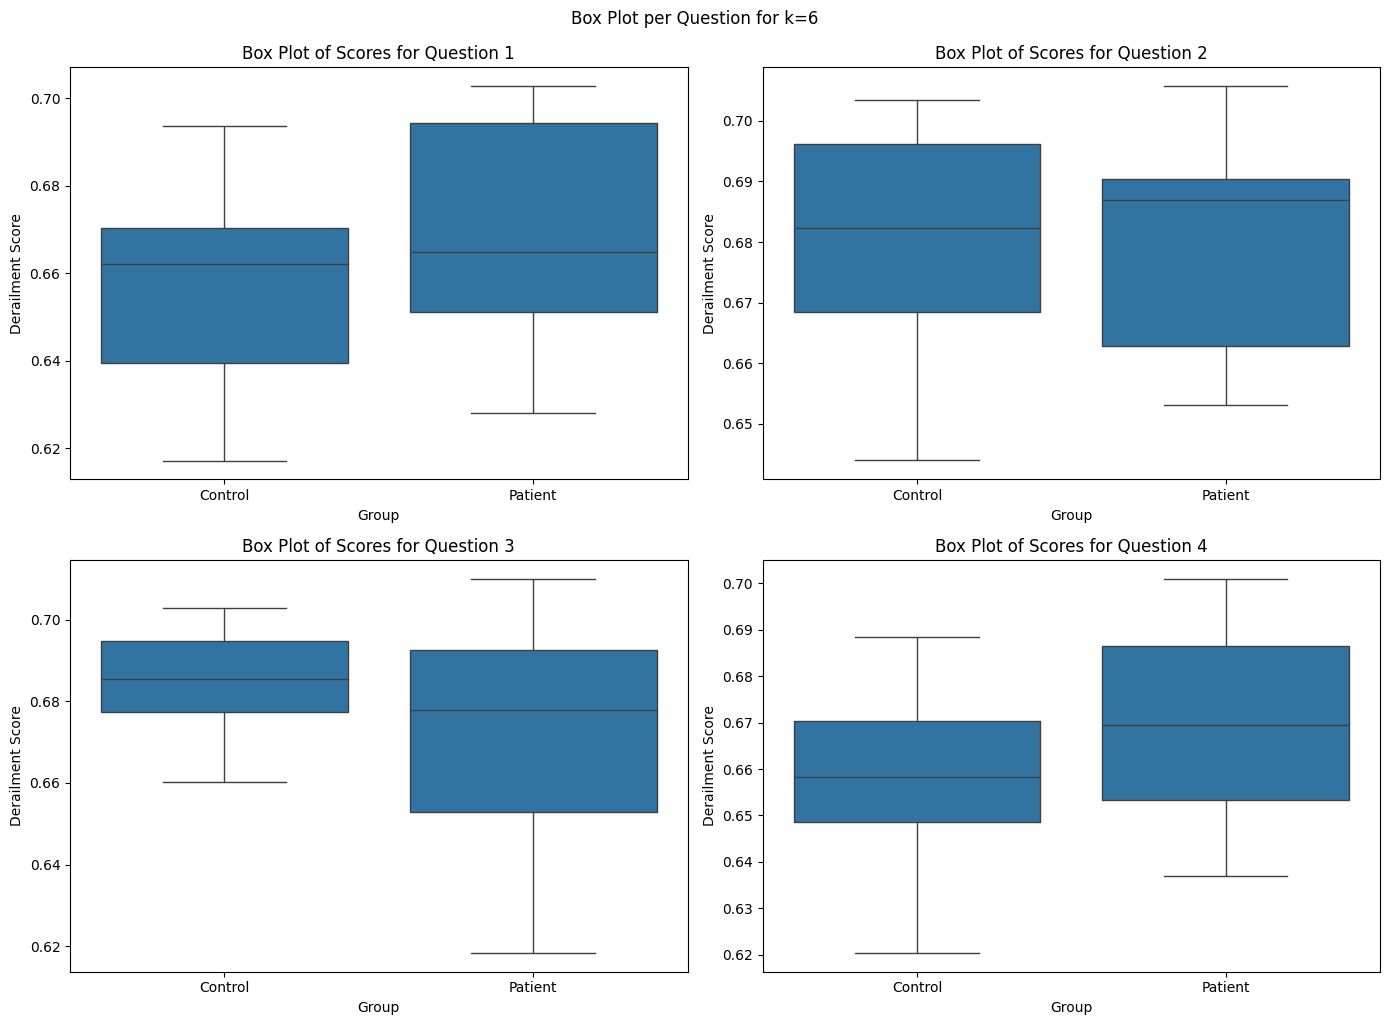

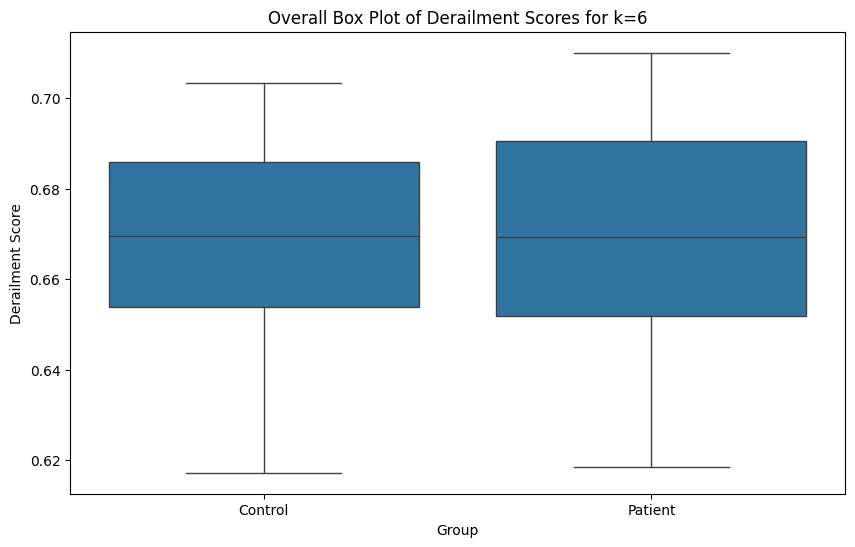

T-Test Results per Question for k=6:
Question 1: t-statistic = -1.0814628286883672, p-value = 0.8559458526859636, control mean = 0.6580090522766113, patient mean = 0.6670191884040833
Question 2: t-statistic = 0.17032433532999175, p-value = 0.43338284659754583, control mean = 0.6804986596107483, patient mean = 0.6789069771766663
Question 3: t-statistic = 1.551941727333841, p-value = 0.06747202555794603, control mean = 0.6851098537445068, patient mean = 0.6704534888267517
Question 4: t-statistic = -1.384421114056321, p-value = 0.9102422949356572, control mean = 0.6583489179611206, patient mean = 0.6693738102912903

Overall T-Test Results for k=6: t-statistic = -0.46599355073990323, p-value = 0.6788729031214209, control mean = 0.6683570742607117, patient mean = 0.6705423593521118

Welch's Test Results per Question for k=6:
Question 1: t-statistic = -1.0709768828139257, p-value = 0.85280470288993
Question 2: t-statistic = 0.16982517581813938, p-value = 0.4339247151877028
Question 3: t-stat

In [33]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=6, sliding_window=False)

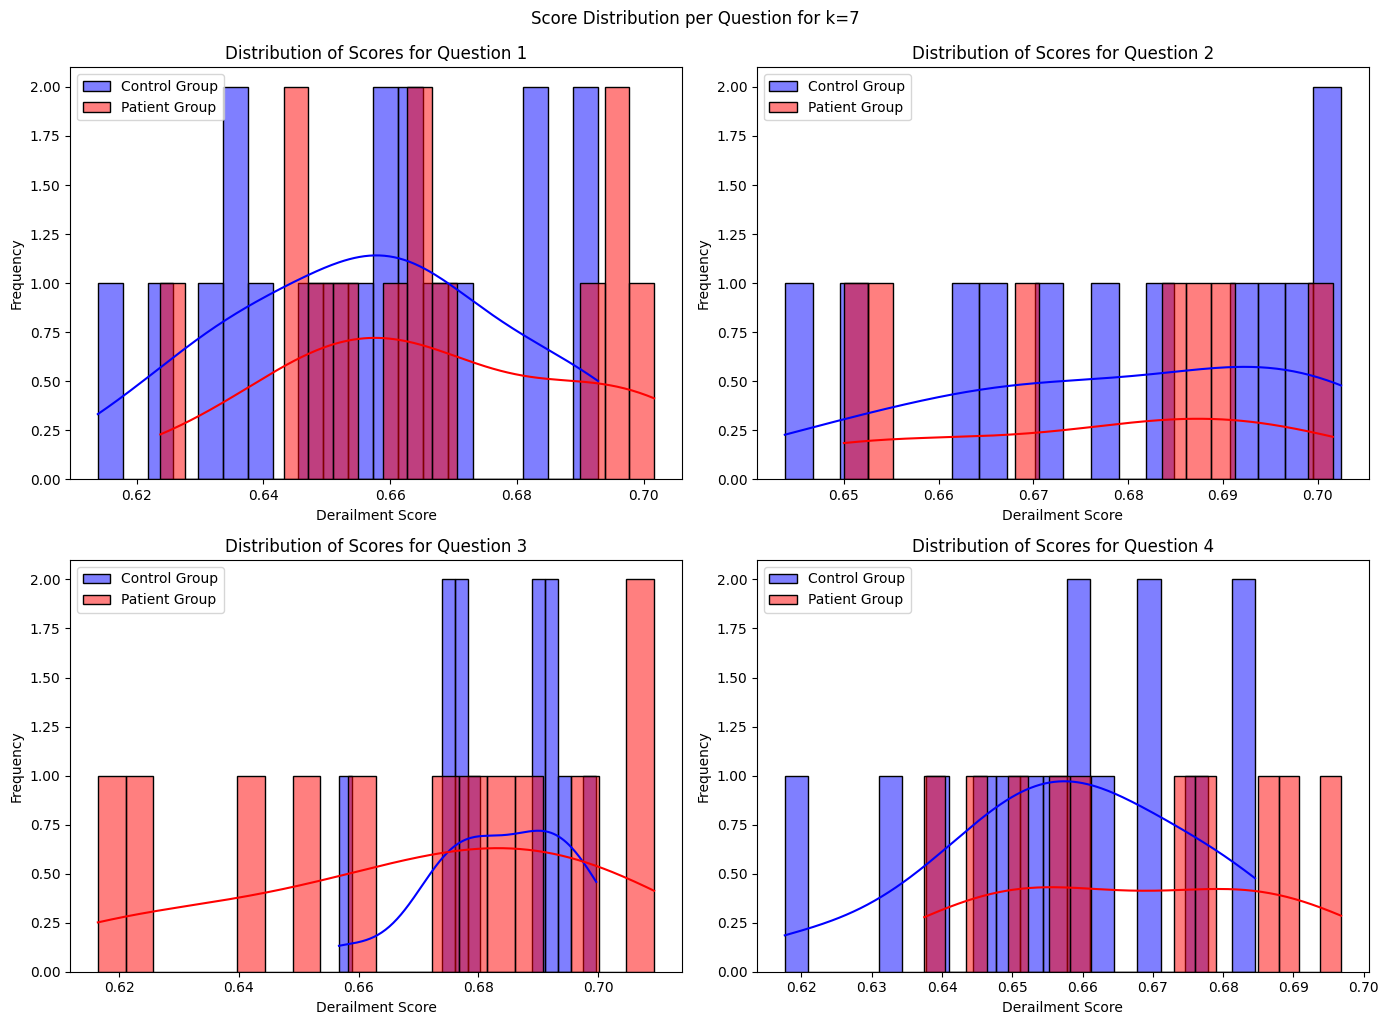

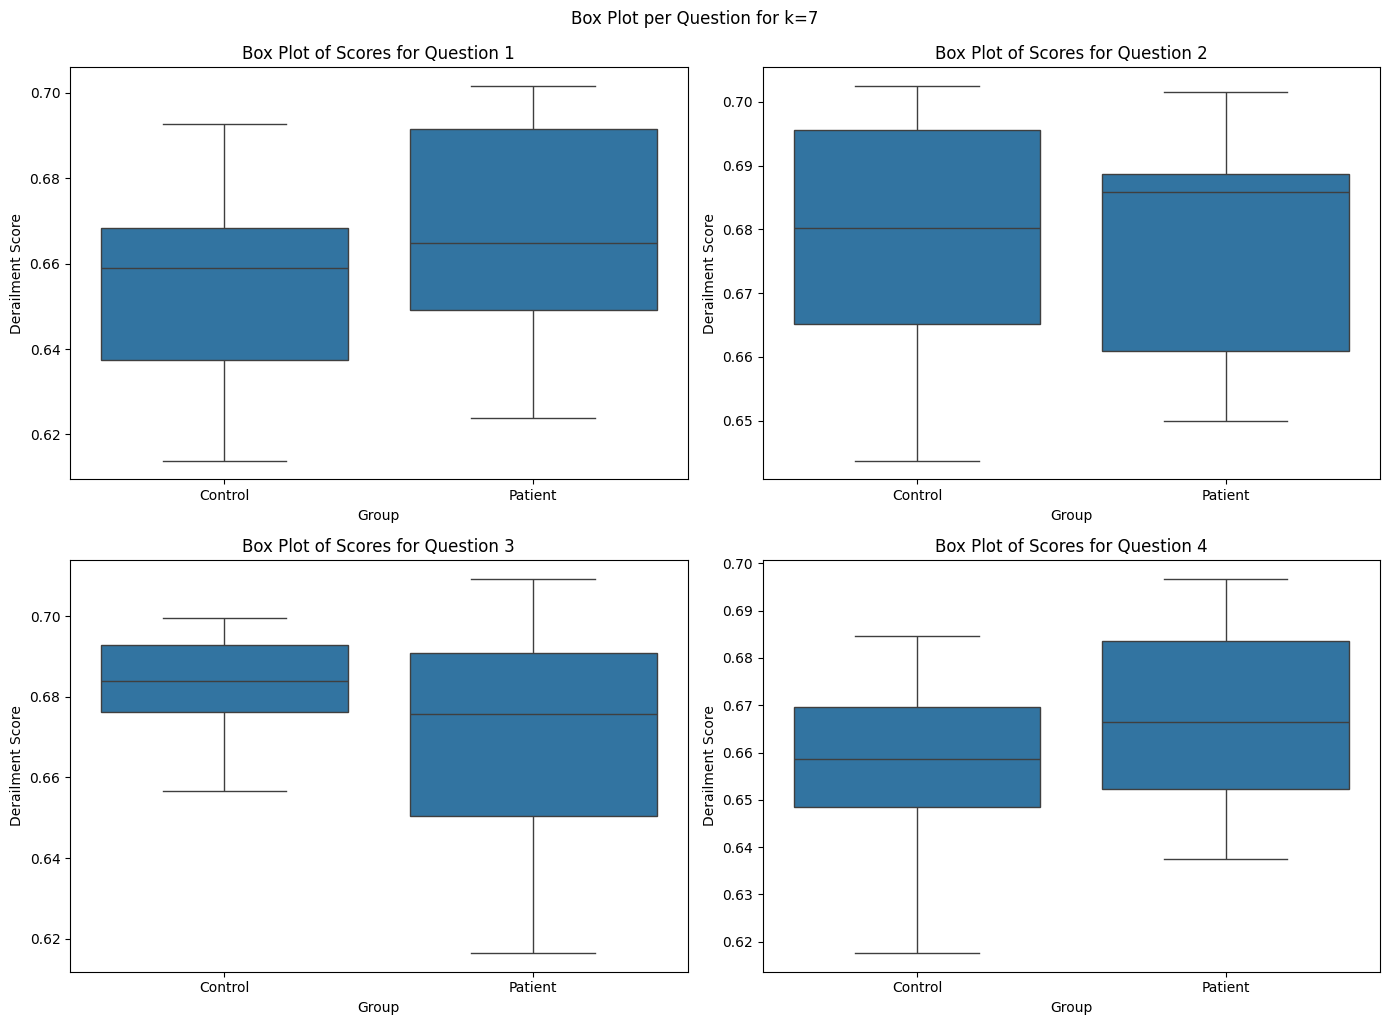

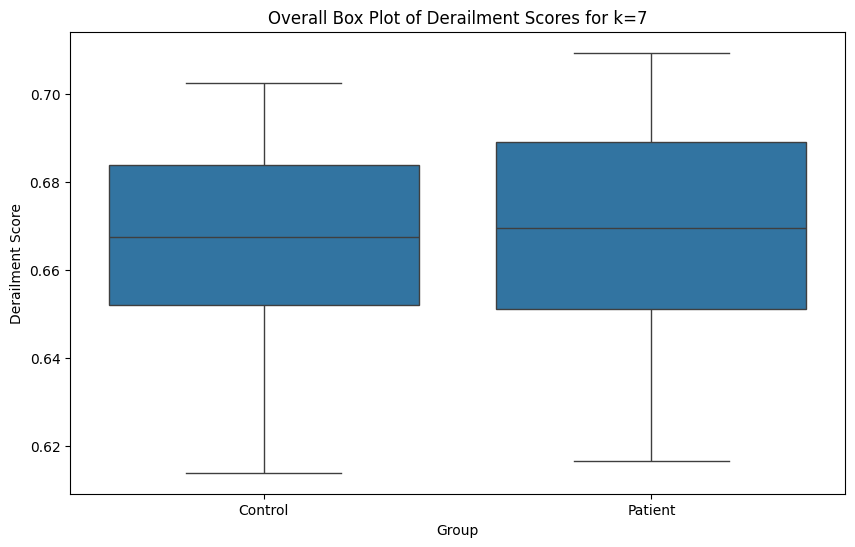

T-Test Results per Question for k=7:
Question 1: t-statistic = -1.2023338696606927, p-value = 0.8806806537206451, control mean = 0.6563228964805603, patient mean = 0.6663213968276978
Question 2: t-statistic = 0.23167318309326917, p-value = 0.40977876821406395, control mean = 0.6788470149040222, patient mean = 0.6766677498817444
Question 3: t-statistic = 1.4774389777821588, p-value = 0.07686582532397947, control mean = 0.6833214163780212, patient mean = 0.6693062782287598
Question 4: t-statistic = -1.2806914015436877, p-value = 0.8934666834487506, control mean = 0.6572600603103638, patient mean = 0.667275071144104

Overall T-Test Results for k=7: t-statistic = -0.495942093748538, p-value = 0.6894771532214339, control mean = 0.6668114066123962, patient mean = 0.6691256761550903

Welch's Test Results per Question for k=7:
Question 1: t-statistic = -1.1874655781674834, p-value = 0.8768530482850816
Question 2: t-statistic = 0.23186813485939994, p-value = 0.4101645373167634
Question 3: t-sta

In [34]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=7, sliding_window=False)

**With sliding window coherence calculation**

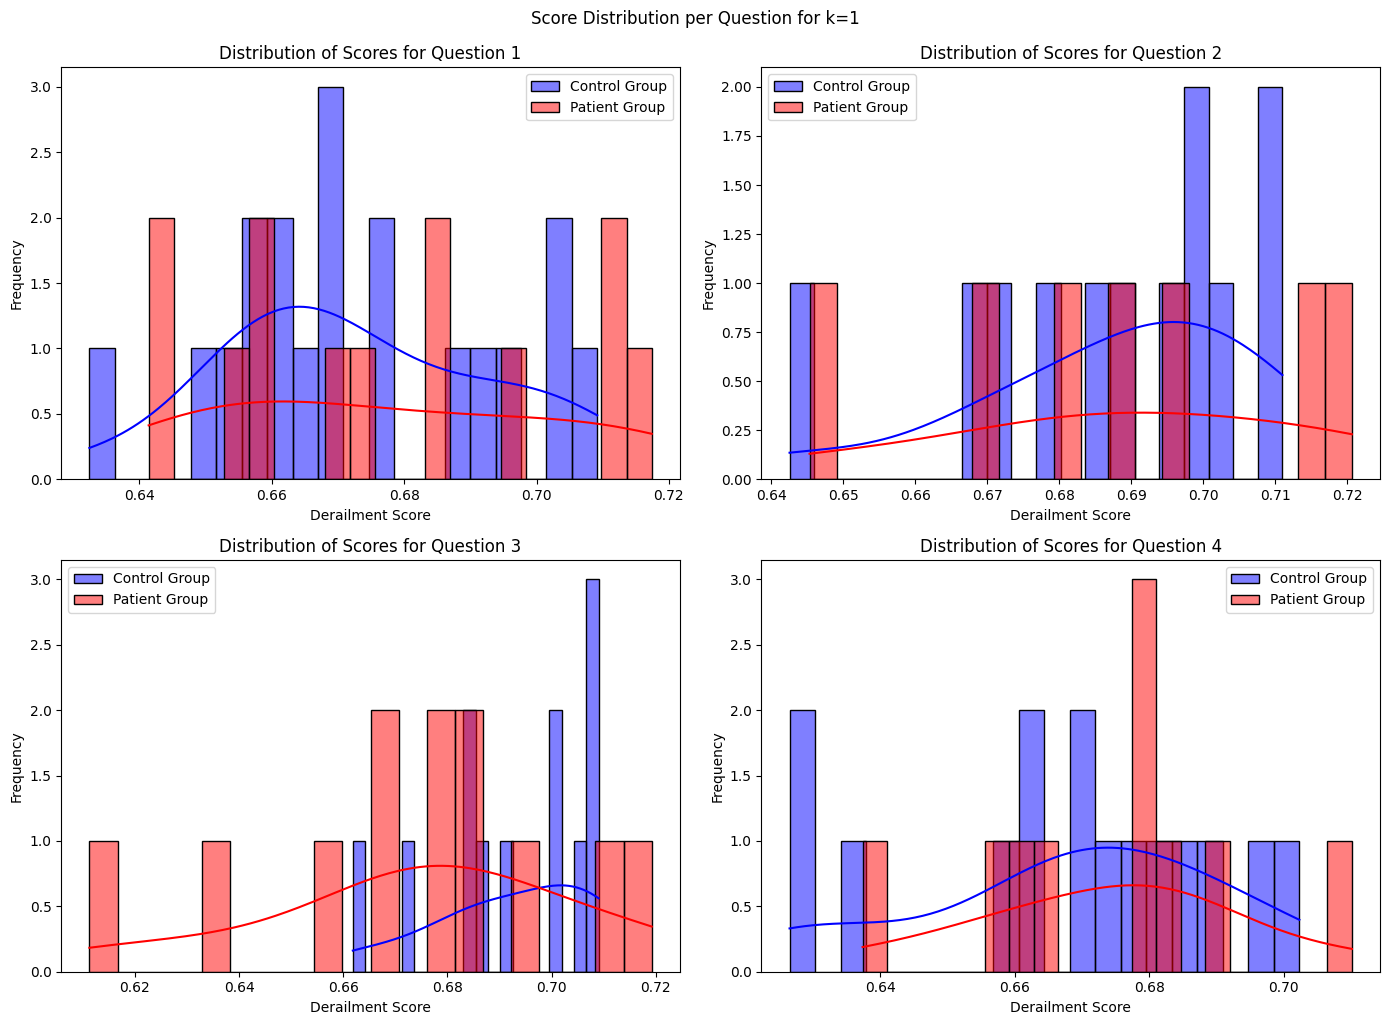

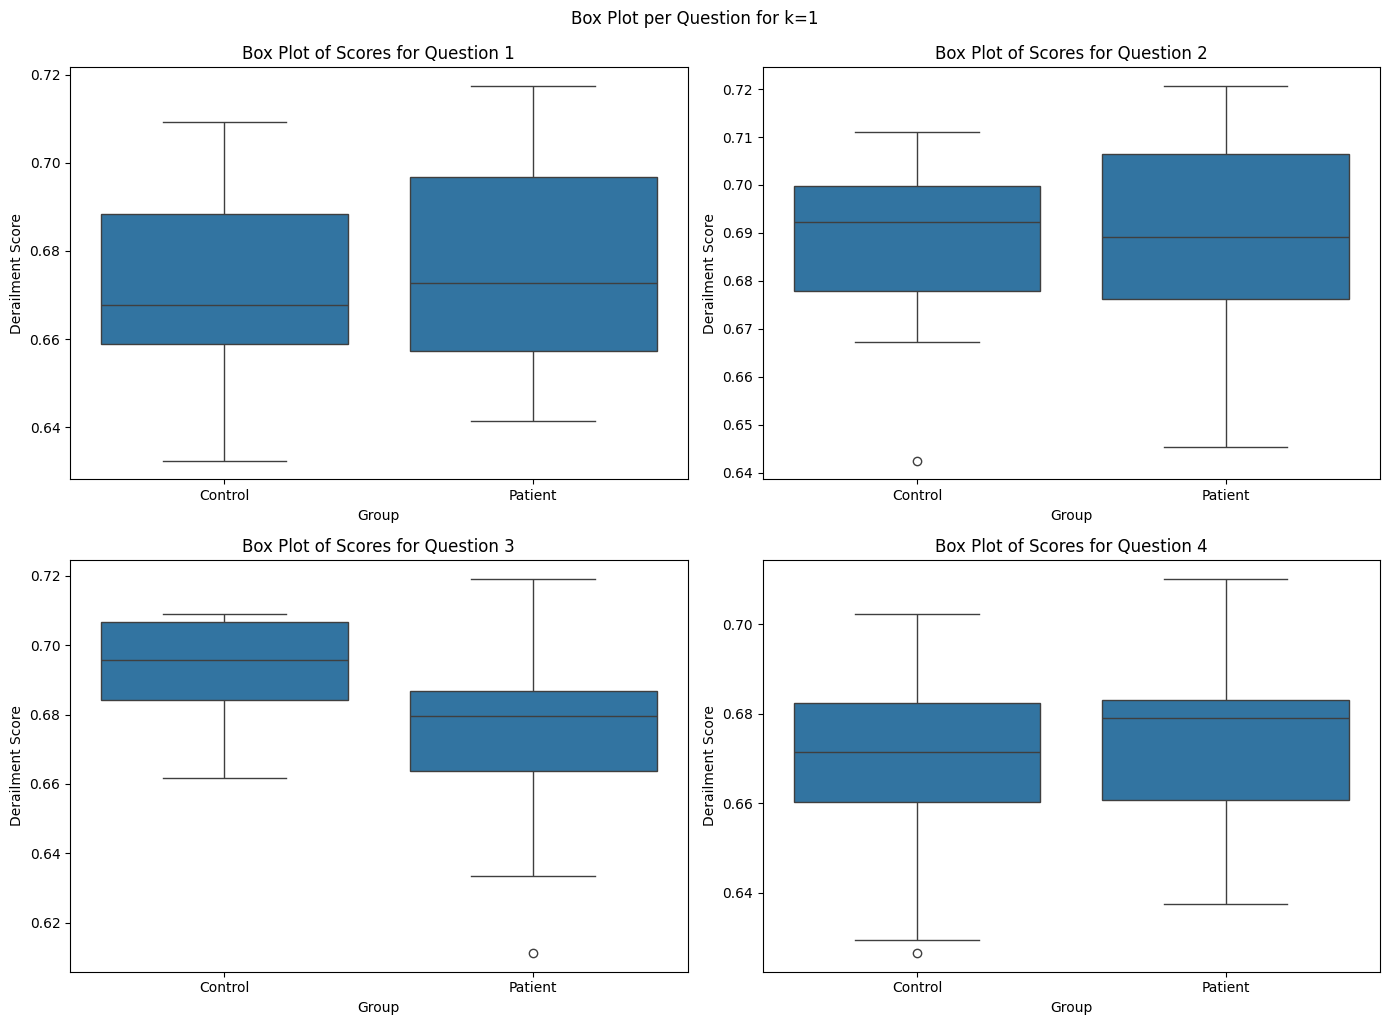

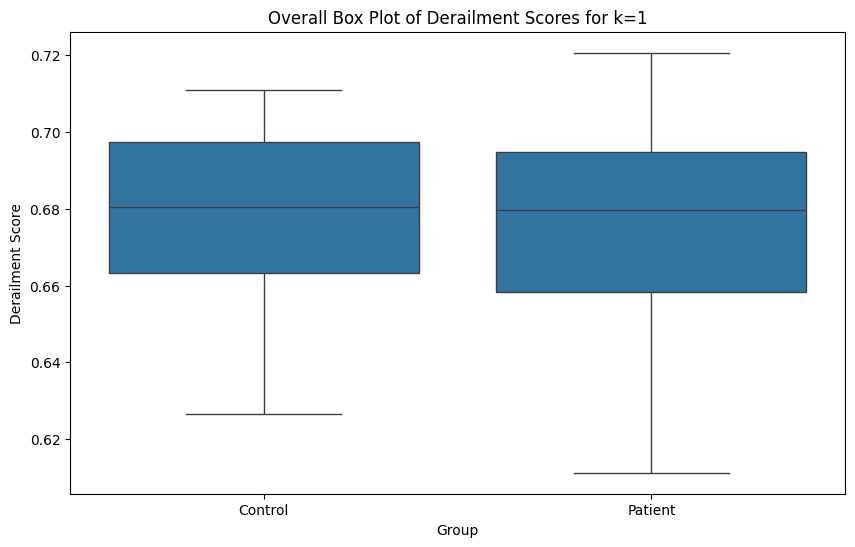

T-Test Results per Question for k=1:
Question 1: t-statistic = -0.567469810189237, p-value = 0.7126912713421554, control mean = 0.6728066205978394, patient mean = 0.6775004267692566
Question 2: t-statistic = -0.11036489396086427, p-value = 0.5432937788119339, control mean = 0.687450110912323, patient mean = 0.6886094212532043
Question 3: t-statistic = 1.8972666570266647, p-value = 0.03549803588199933, control mean = 0.6927609443664551, patient mean = 0.6740491986274719
Question 4: t-statistic = -0.7051663492072642, p-value = 0.7561063403040011, control mean = 0.6676560640335083, patient mean = 0.673952579498291

Overall T-Test Results for k=1: t-statistic = 0.23182483624632644, p-value = 0.408578726538453, control mean = 0.6786327362060547, patient mean = 0.6775211095809937

Welch's Test Results per Question for k=1:
Question 1: t-statistic = -0.5414808946113422, p-value = 0.7031427043170382
Question 2: t-statistic = -0.1022754046820531, p-value = 0.53972670120402
Question 3: t-statist

In [36]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=1, sliding_window=True)

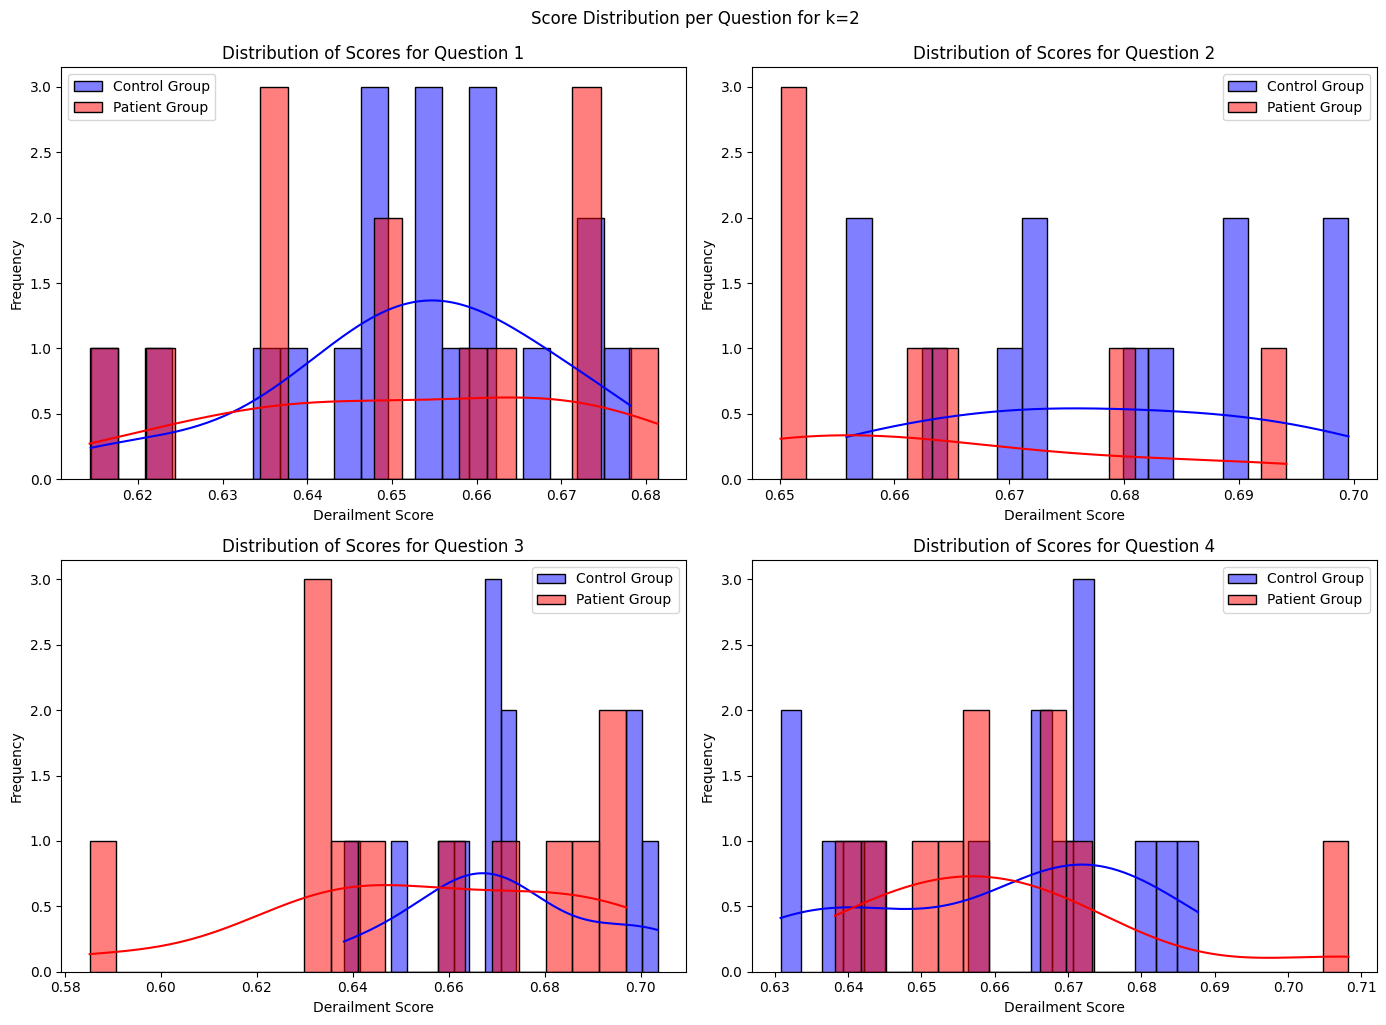

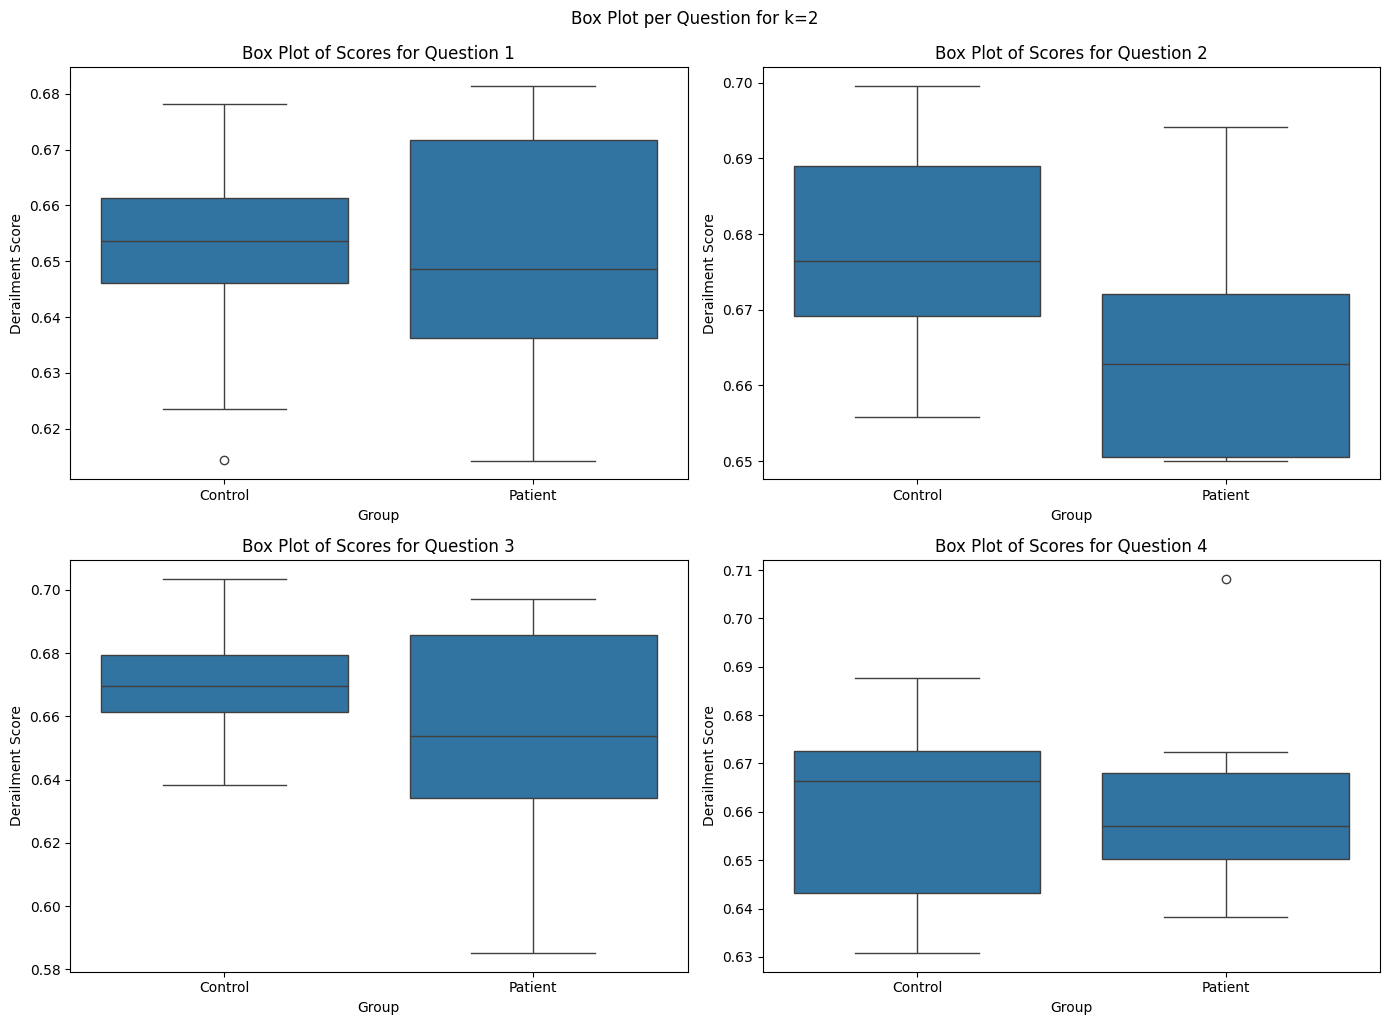

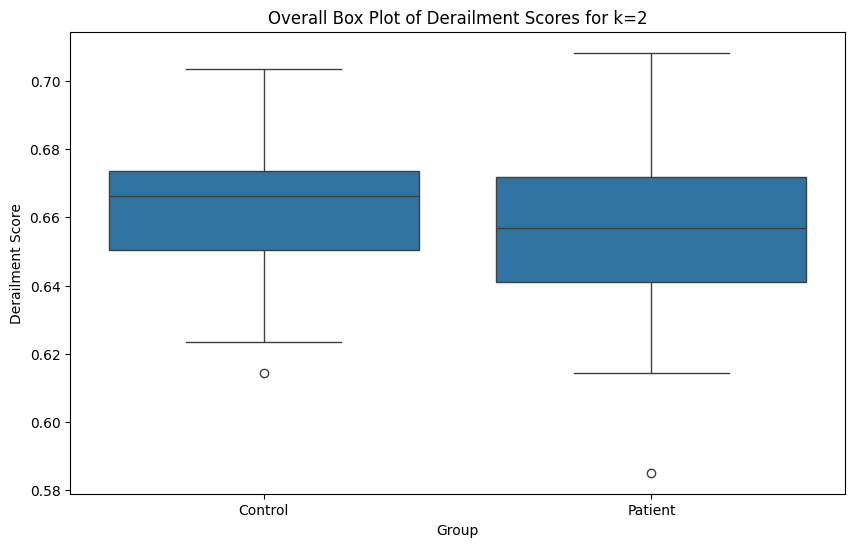

T-Test Results per Question for k=2:
Question 1: t-statistic = 0.20788299157620369, p-value = 0.41836258071248533, control mean = 0.6524472832679749, patient mean = 0.6510505676269531
Question 2: t-statistic = 1.7670039924477507, p-value = 0.04758688008964345, control mean = 0.6777324080467224, patient mean = 0.664609968662262
Question 3: t-statistic = 1.4553084608436548, p-value = 0.07985285946535925, control mean = 0.6718918681144714, patient mean = 0.6555966138839722
Question 4: t-statistic = -0.08422840830947735, p-value = 0.5331981610184353, control mean = 0.6608422994613647, patient mean = 0.661506712436676

Overall T-Test Results for k=2: t-statistic = 1.5345159862199518, p-value = 0.06406249035985367, control mean = 0.6638728380203247, patient mean = 0.6570988297462463

Welch's Test Results per Question for k=2:
Question 1: t-statistic = 0.19848161913047896, p-value = 0.42225940575084037
Question 2: t-statistic = 1.7023542554743705, p-value = 0.05798262914357781
Question 3: t-s

In [37]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=2, sliding_window=True)

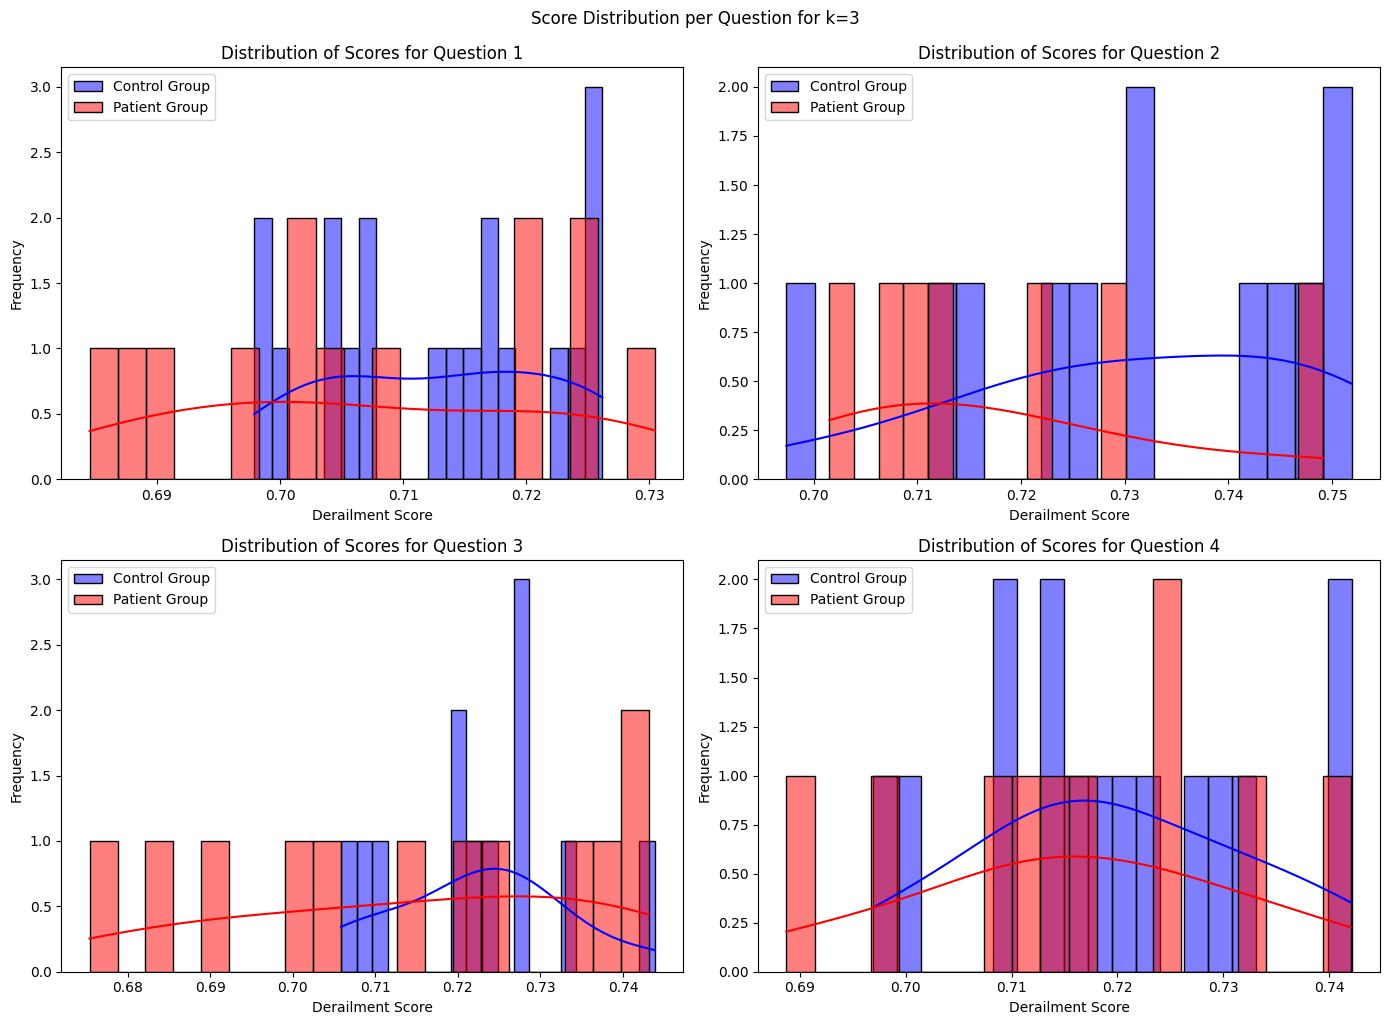

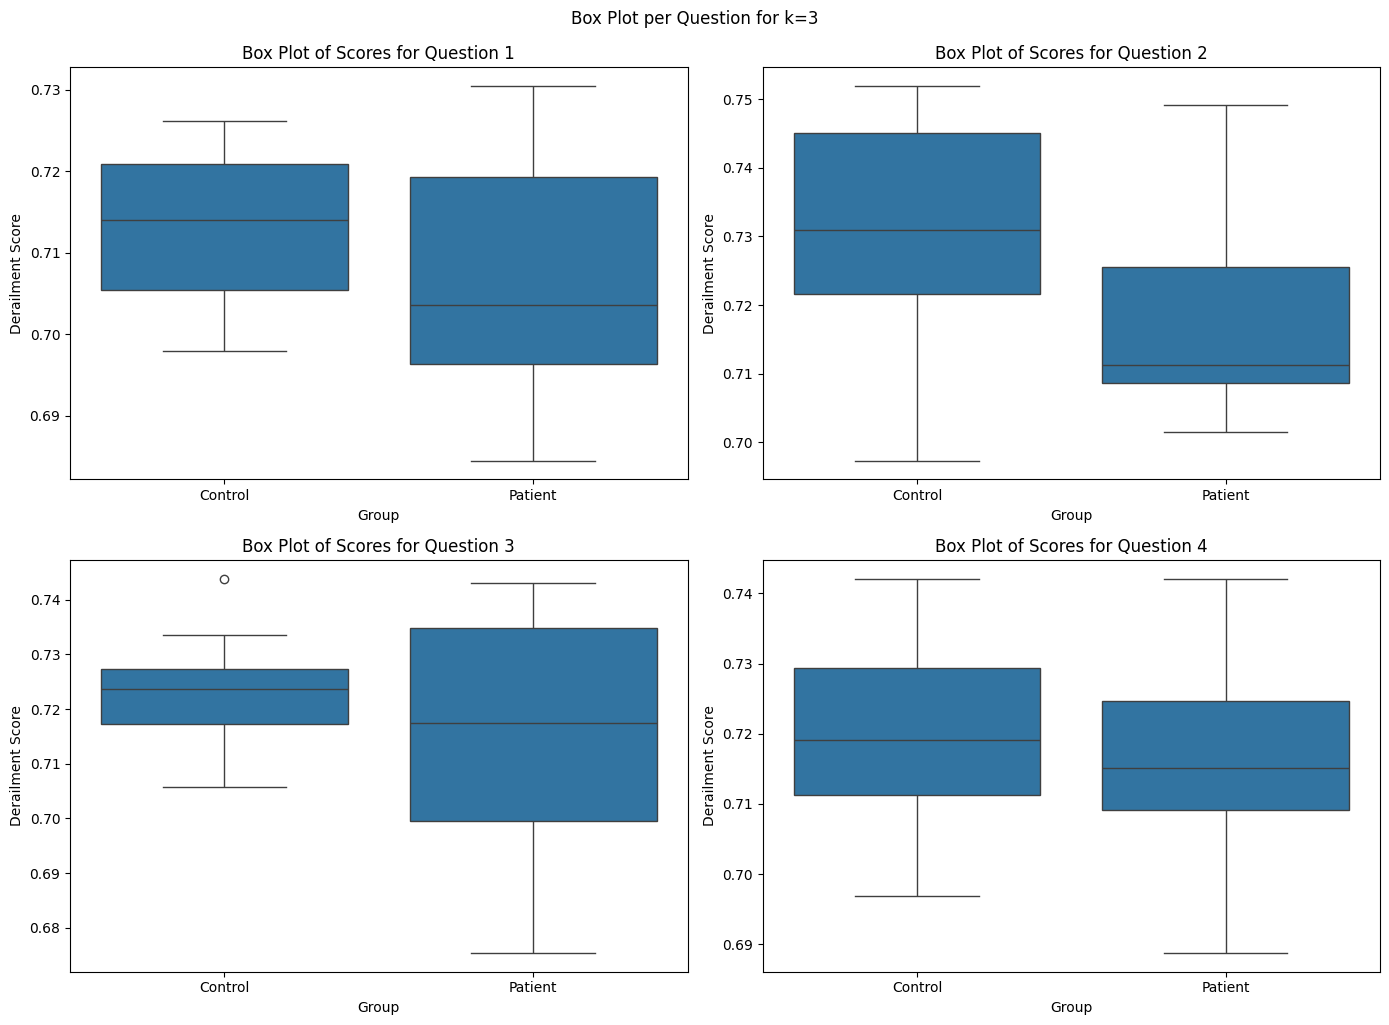

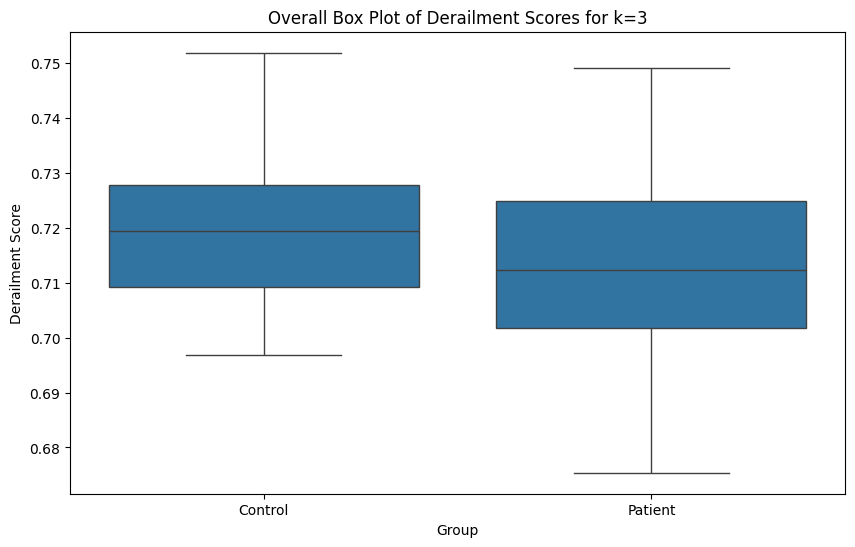

T-Test Results per Question for k=3:
Question 1: t-statistic = 1.2930177685976405, p-value = 0.10293705930148508, control mean = 0.7129819989204407, patient mean = 0.7072747945785522
Question 2: t-statistic = 1.5607111868473411, p-value = 0.06850691347458666, control mean = 0.7310409545898438, patient mean = 0.7186414003372192
Question 3: t-statistic = 1.1484911089832193, p-value = 0.13155032997822472, control mean = 0.7225742340087891, patient mean = 0.7142496109008789
Question 4: t-statistic = 0.6055735809084122, p-value = 0.2753637608967612, control mean = 0.7195180058479309, patient mean = 0.715973436832428

Overall T-Test Results for k=3: t-statistic = 2.251465331370068, p-value = 0.01329450108218098, control mean = 0.7203933000564575, patient mean = 0.7132331132888794

Welch's Test Results per Question for k=3:
Question 1: t-statistic = 1.1871121558067455, p-value = 0.1251472872959405
Question 2: t-statistic = 1.5755553731922942, p-value = 0.0695207922374439
Question 3: t-statist

In [38]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=3, sliding_window=True)

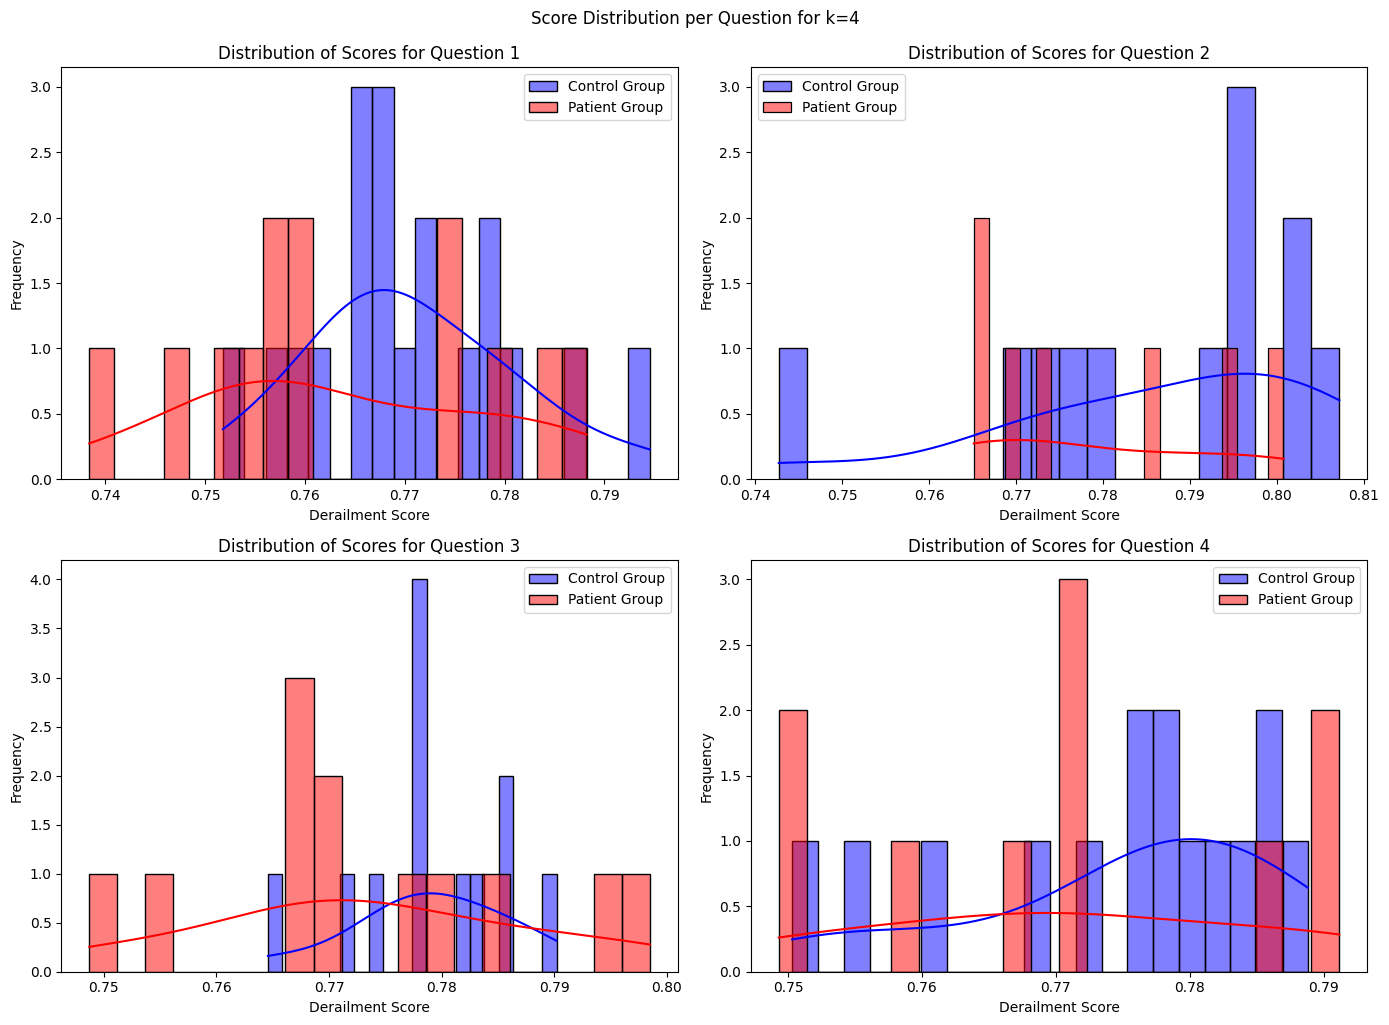

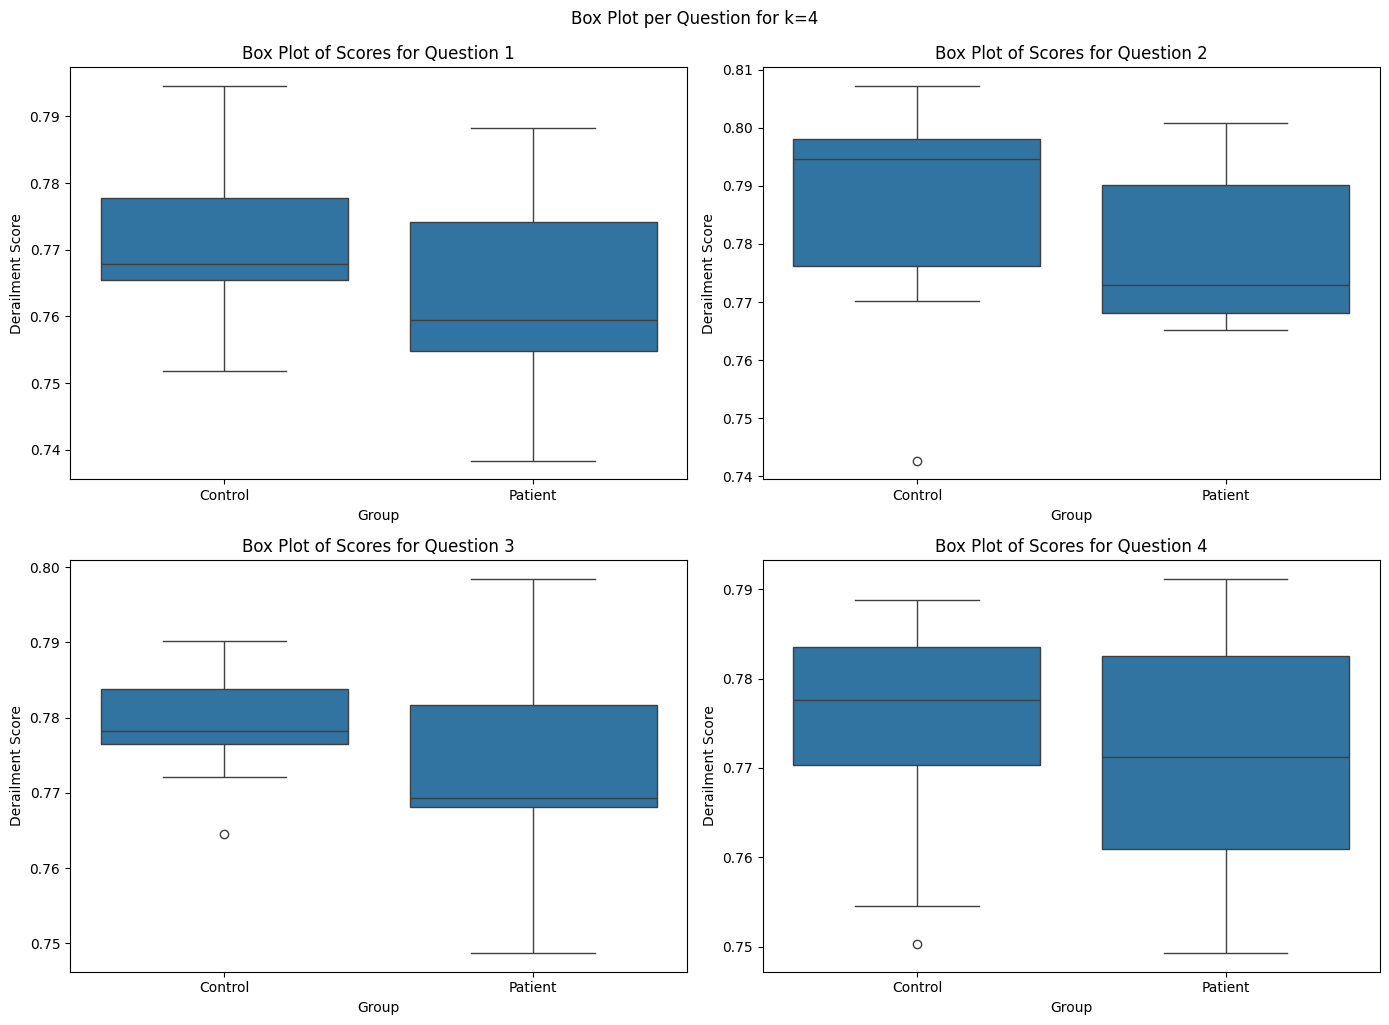

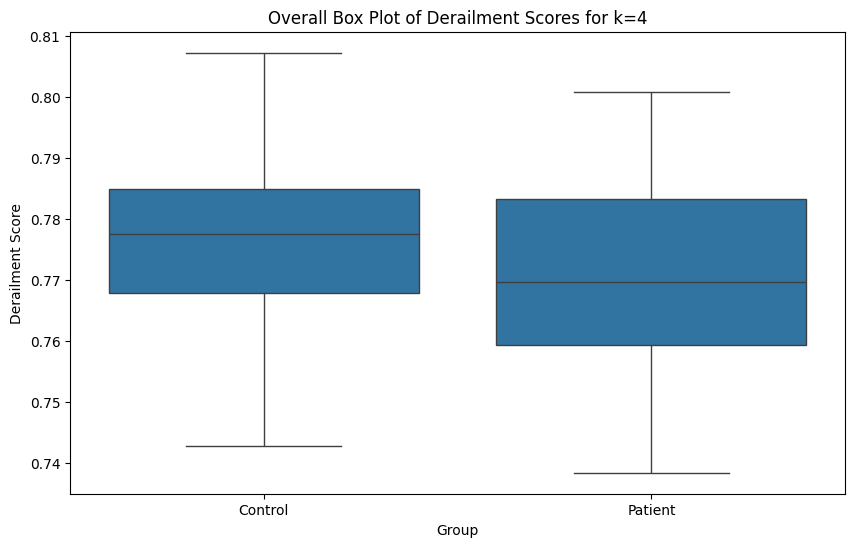

T-Test Results per Question for k=4:
Question 1: t-statistic = 1.5806503815905837, p-value = 0.062222615930777866, control mean = 0.7706508636474609, patient mean = 0.7635220289230347
Question 2: t-statistic = 0.8778063768136182, p-value = 0.19614307495415056, control mean = 0.7864697575569153, patient mean = 0.7793088555335999
Question 3: t-statistic = 1.1536685840737997, p-value = 0.13050798880252382, control mean = 0.7790381908416748, patient mean = 0.7735962271690369
Question 4: t-statistic = 0.7794219537748575, p-value = 0.22183891520822896, control mean = 0.7747913599014282, patient mean = 0.7706414461135864

Overall T-Test Results for k=4: t-statistic = 2.083873378053054, p-value = 0.019886731936172516, control mean = 0.7767297029495239, patient mean = 0.7707266211509705

Welch's Test Results per Question for k=4:
Question 1: t-statistic = 1.4784228166560496, p-value = 0.07748309801033698
Question 2: t-statistic = 0.9412033386889743, p-value = 0.18056245896268713
Question 3: t-s

In [39]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=4, sliding_window=True)

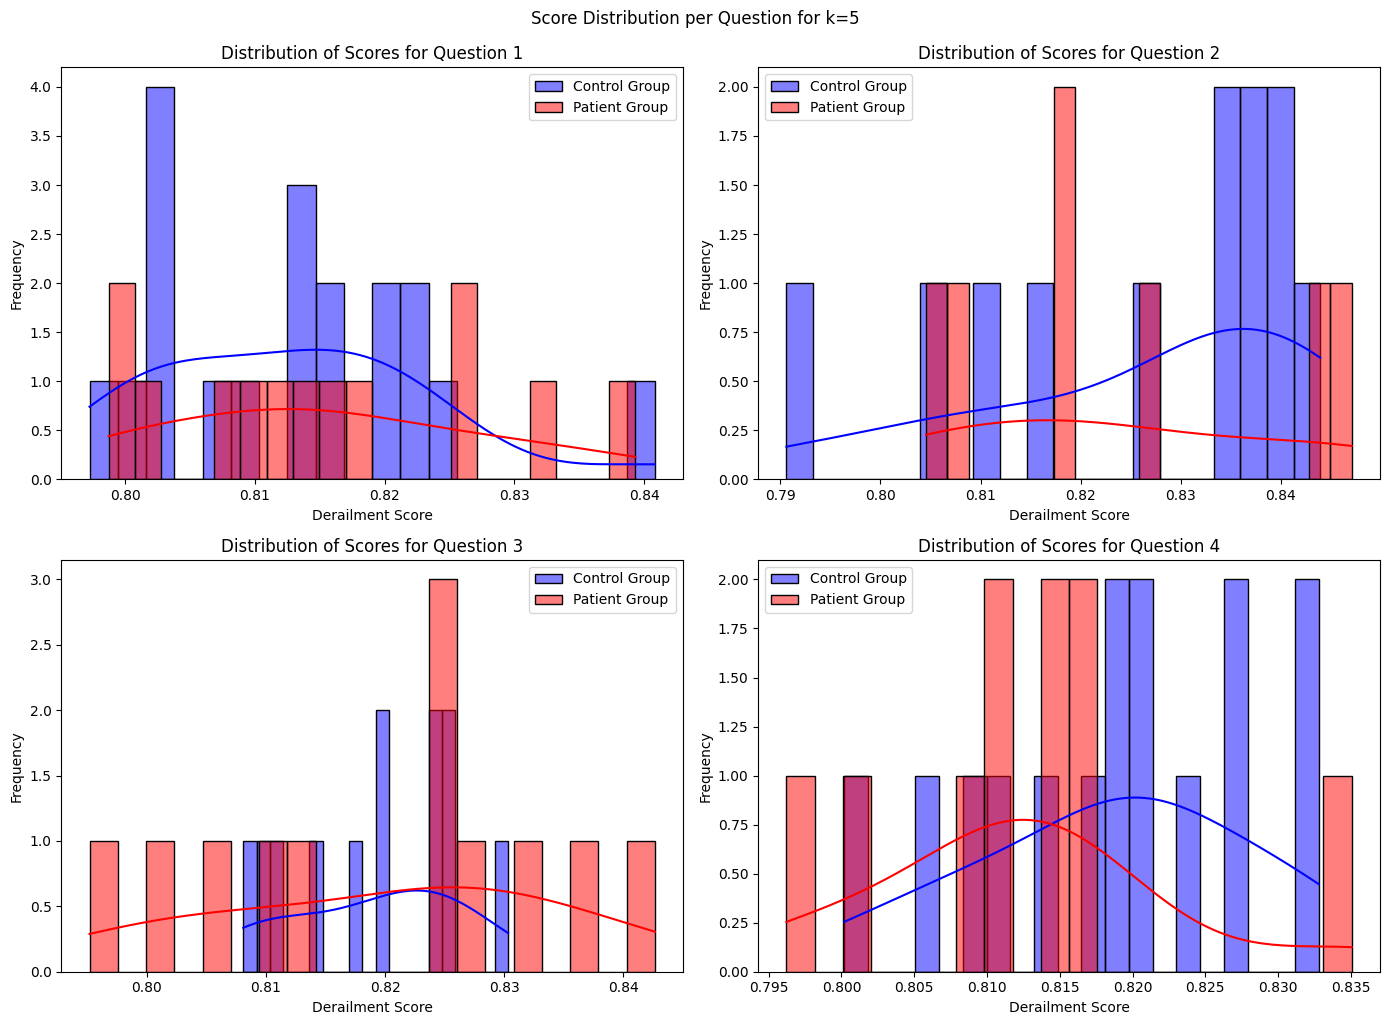

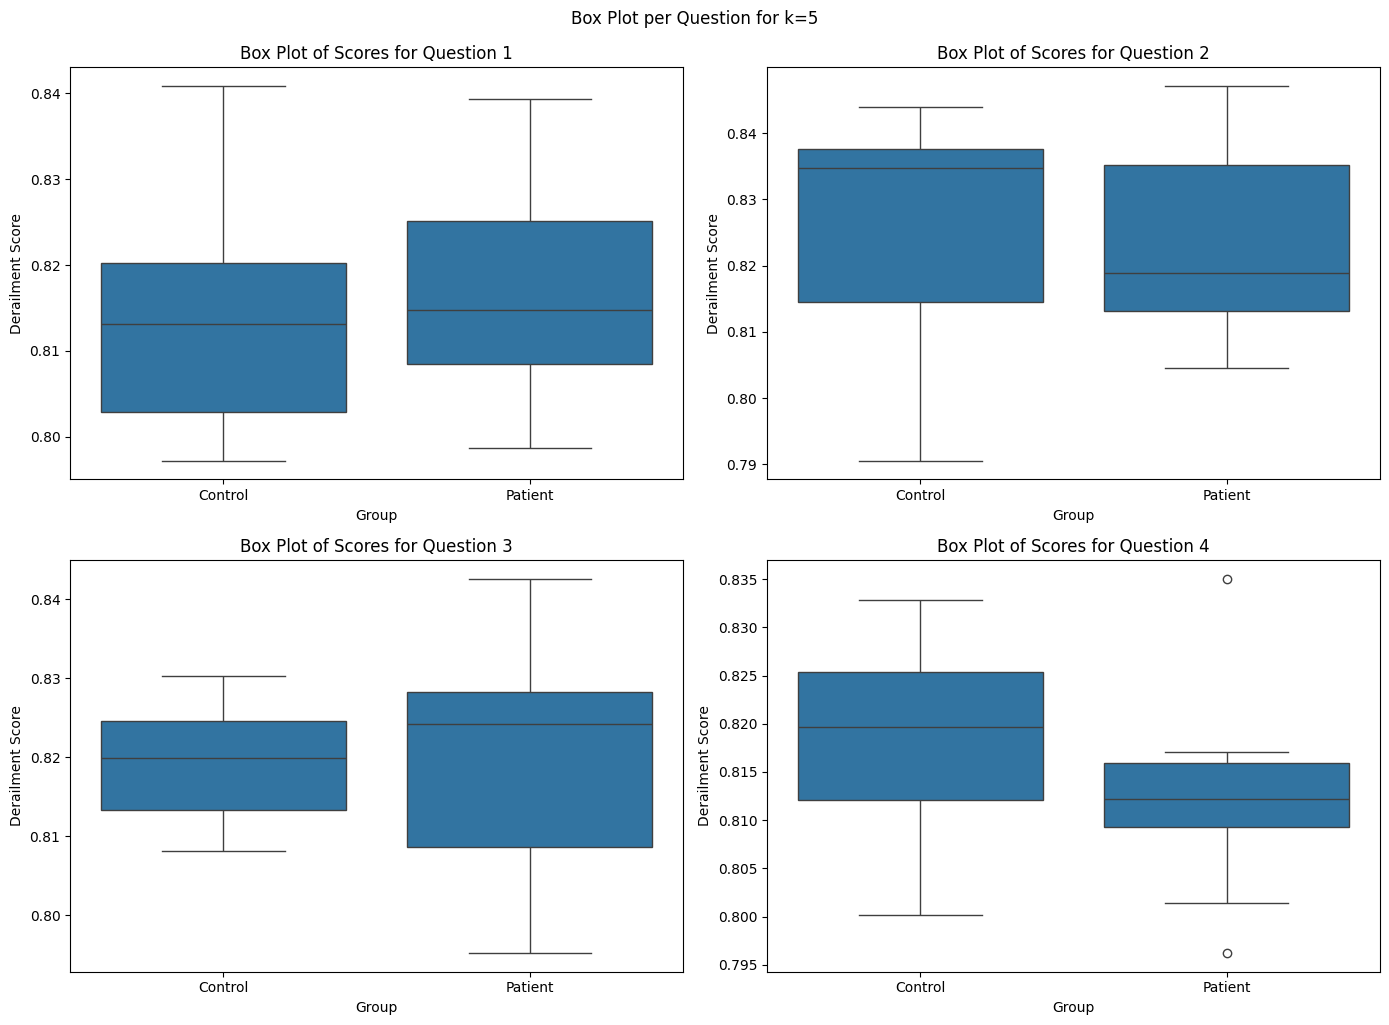

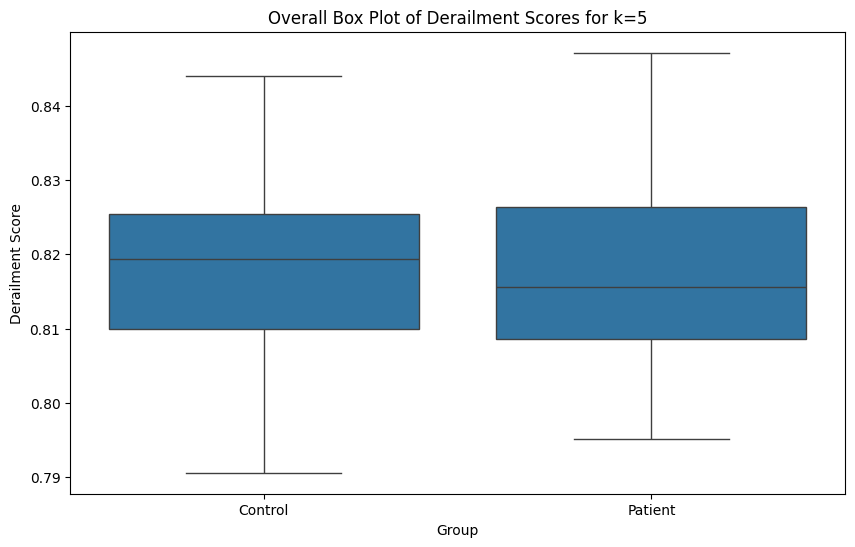

T-Test Results per Question for k=5:
Question 1: t-statistic = -0.6863221366038762, p-value = 0.7511096702940718, control mean = 0.8128517270088196, patient mean = 0.8156880736351013
Question 2: t-statistic = 0.2842682024151891, p-value = 0.38981916483596524, control mean = 0.8261378407478333, patient mean = 0.8238751292228699
Question 3: t-statistic = -0.12611323909692876, p-value = 0.5496061283854525, control mean = 0.8191025853157043, patient mean = 0.8196987509727478
Question 4: t-statistic = 1.5393535152940592, p-value = 0.06868194702608543, control mean = 0.8186648488044739, patient mean = 0.812446117401123

Overall T-Test Results for k=5: t-statistic = 0.3765237466313253, p-value = 0.35367077096274613, control mean = 0.8183973431587219, patient mean = 0.8174265623092651

Welch's Test Results per Question for k=5:
Question 1: t-statistic = -0.665851201958003, p-value = 0.743954111278444
Question 2: t-statistic = 0.2863684076071208, p-value = 0.3895590291181559
Question 3: t-stati

In [40]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=5, sliding_window=True)

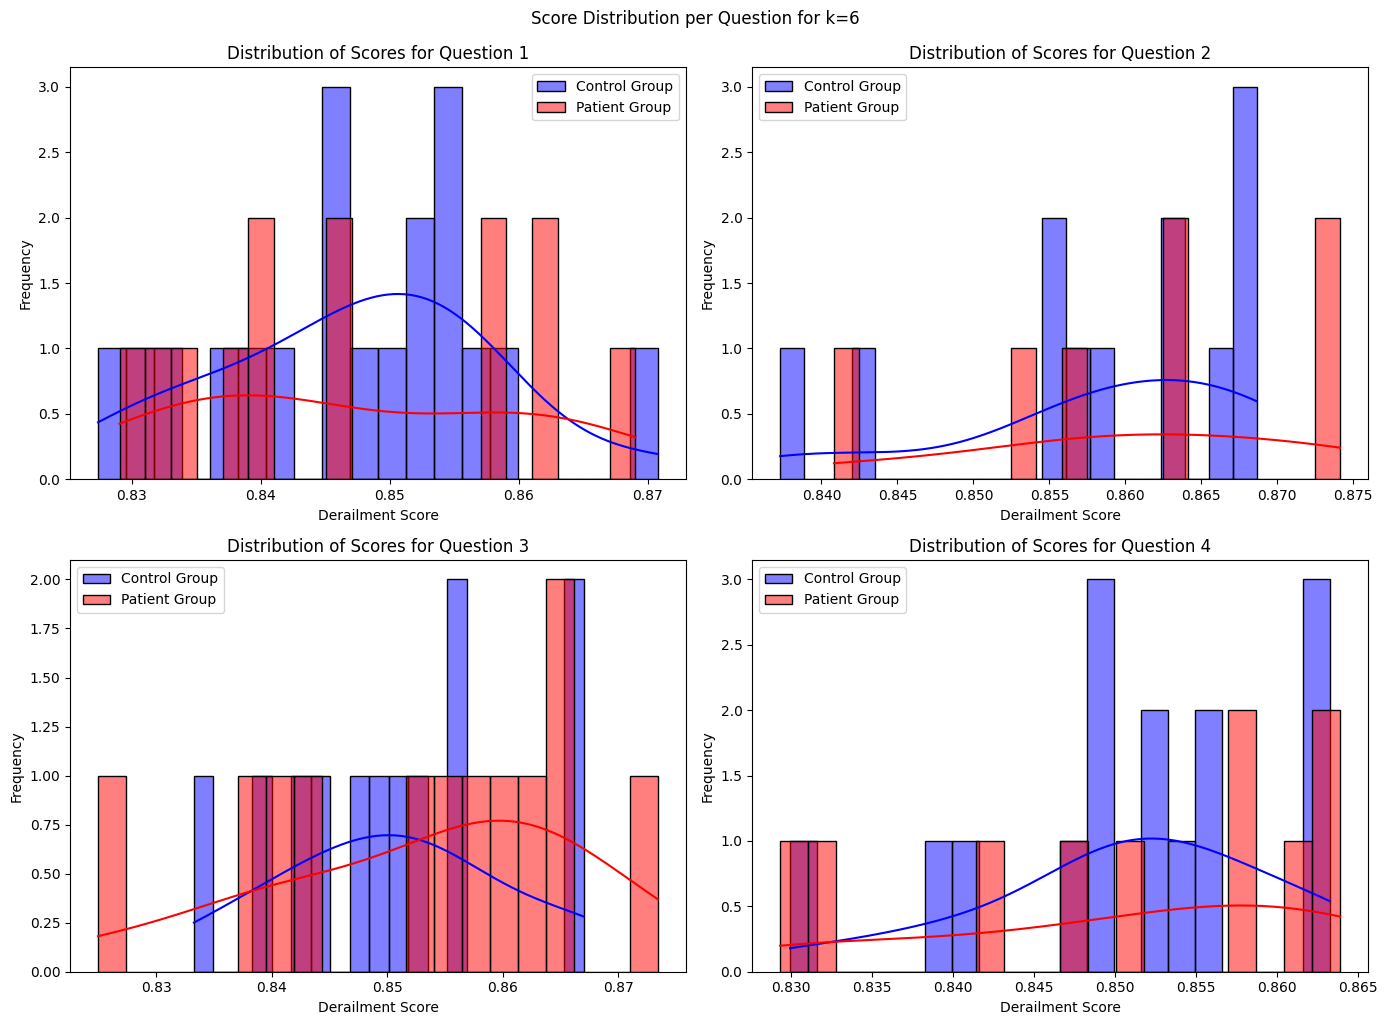

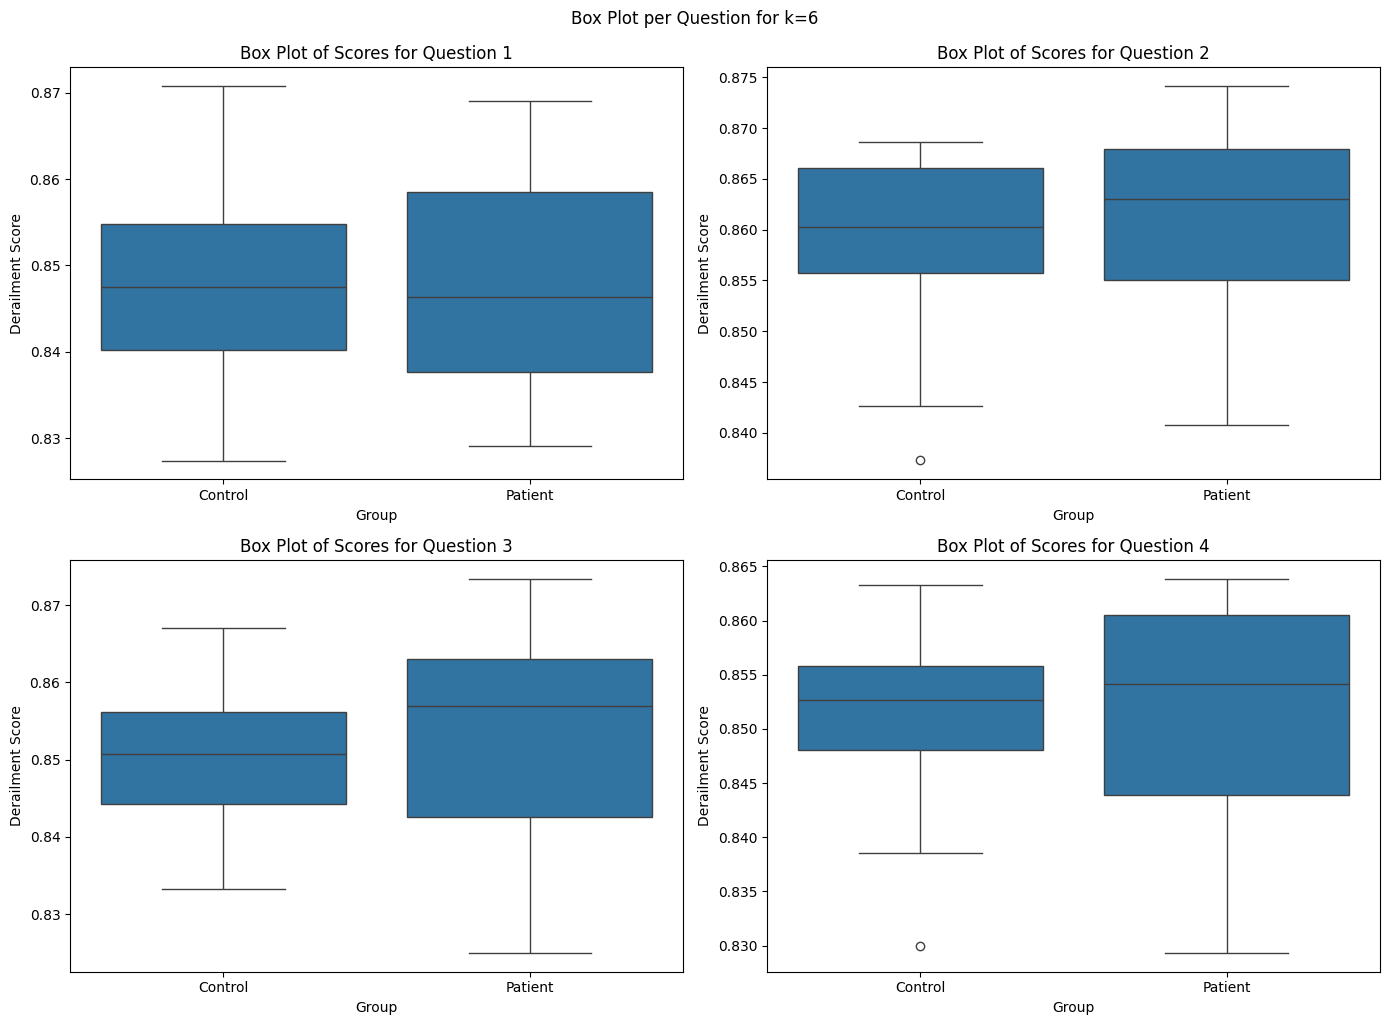

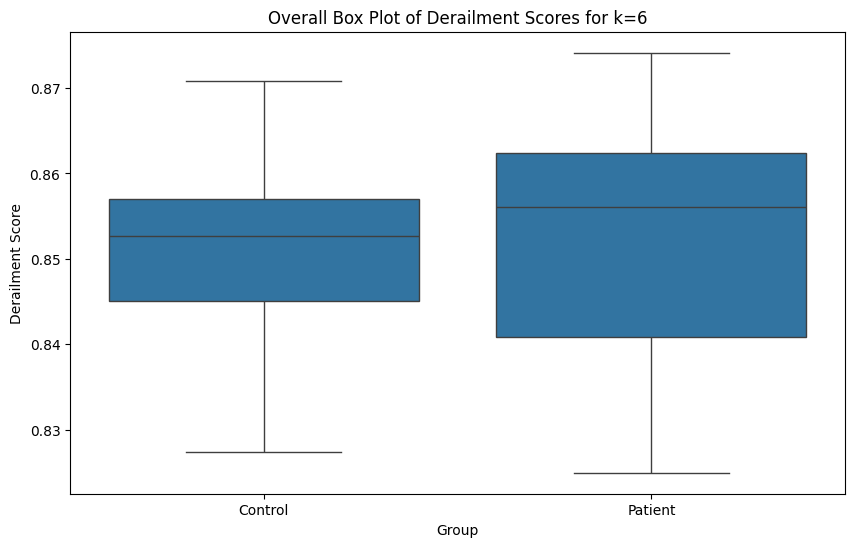

T-Test Results per Question for k=6:
Question 1: t-statistic = -0.014242739418849586, p-value = 0.5056346892599741, control mean = 0.8473517894744873, patient mean = 0.8474121689796448
Question 2: t-statistic = -0.4035171594123321, p-value = 0.6542010069081242, control mean = 0.8585346341133118, patient mean = 0.8605567216873169
Question 3: t-statistic = -0.5254863130742432, p-value = 0.6977491131042692, control mean = 0.8505784869194031, patient mean = 0.8531891703605652
Question 4: t-statistic = 0.07151633172102063, p-value = 0.47180253612903056, control mean = 0.8508594632148743, patient mean = 0.8505479097366333

Overall T-Test Results for k=6: t-statistic = -0.3174275971342905, p-value = 0.624202758347169, control mean = 0.8512401580810547, patient mean = 0.8520001173019409

Welch's Test Results per Question for k=6:
Question 1: t-statistic = -0.013715764111710639, p-value = 0.5054110380641419
Question 2: t-statistic = -0.3872296680519592, p-value = 0.647072653960708
Question 3: t

In [41]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=6, sliding_window=True)

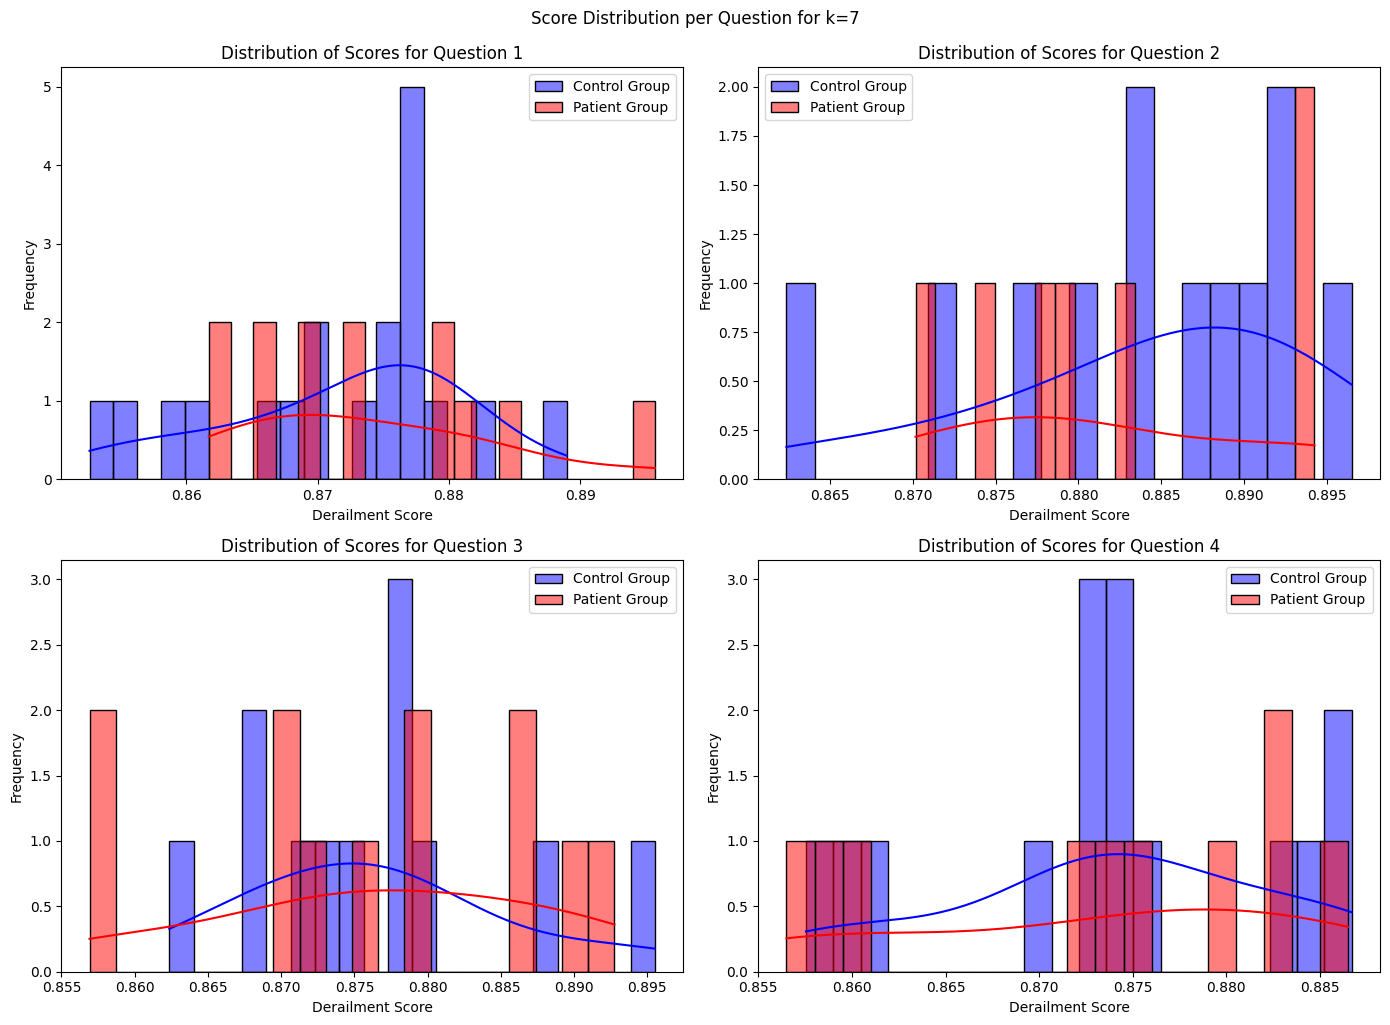

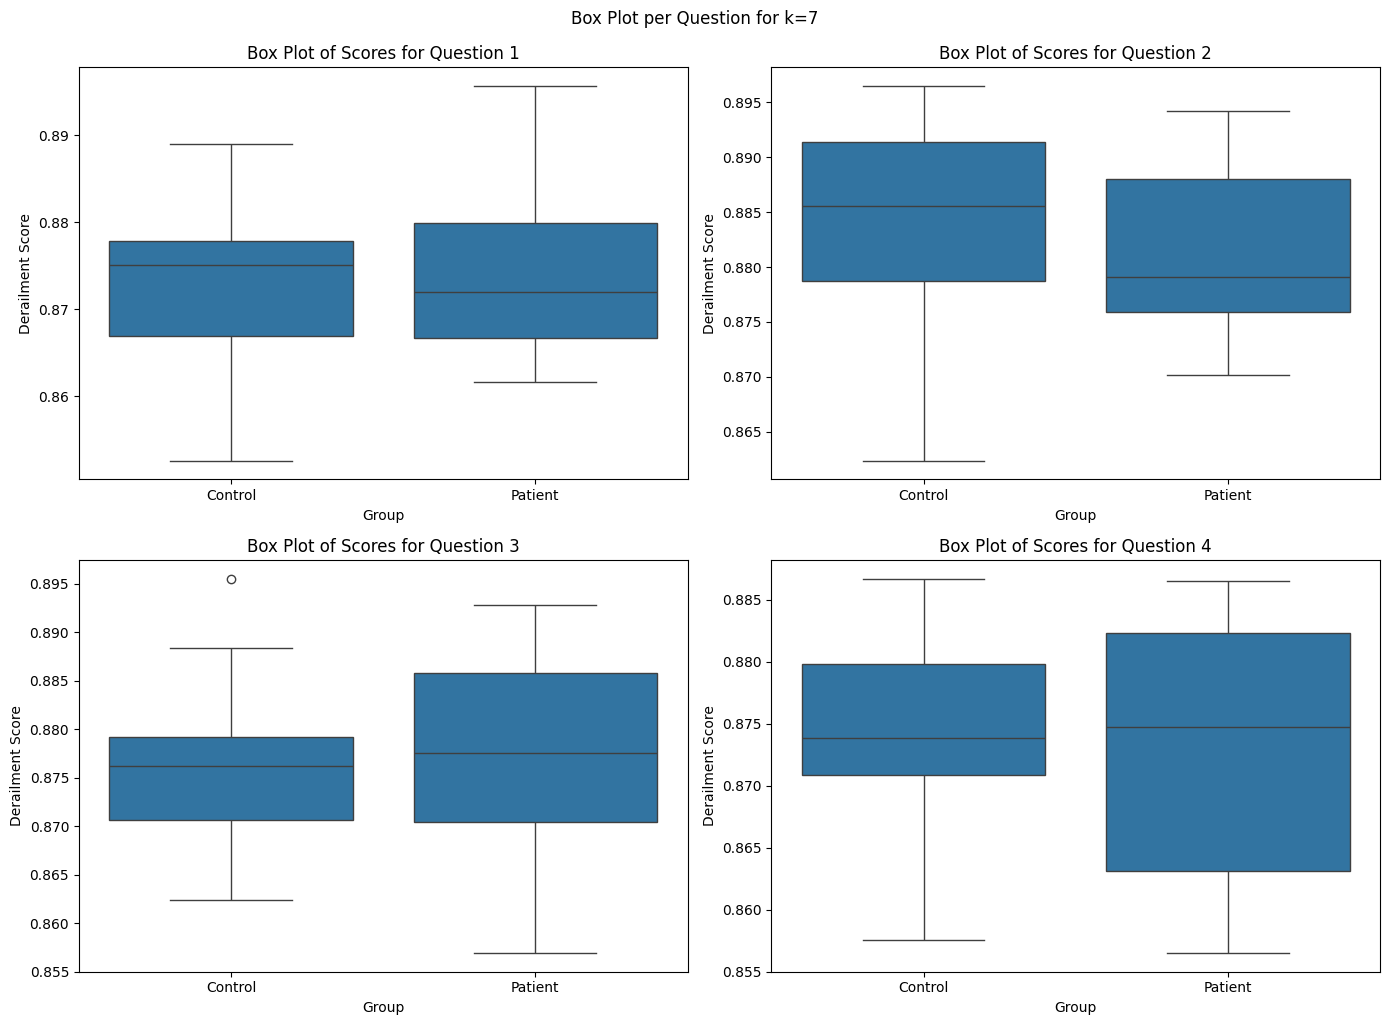

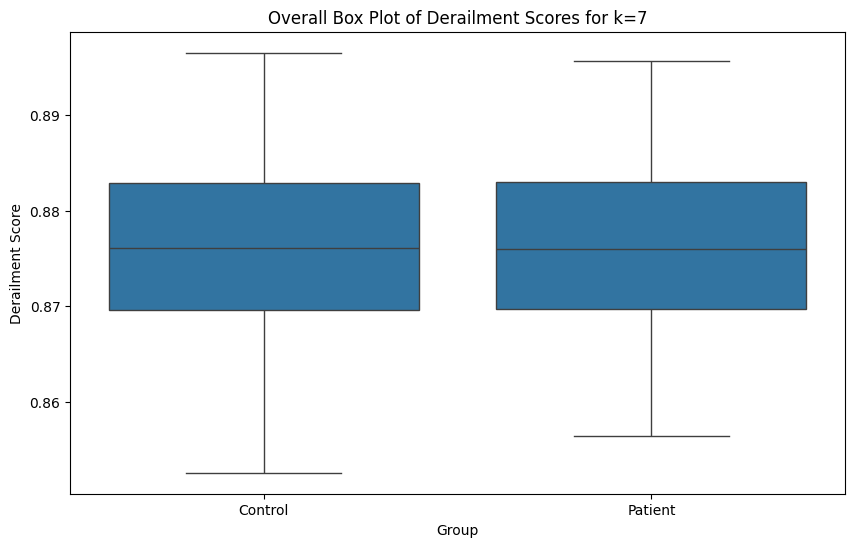

T-Test Results per Question for k=7:
Question 1: t-statistic = -0.5795375756041622, p-value = 0.7167232343220917, control mean = 0.8718763589859009, patient mean = 0.8738731741905212
Question 2: t-statistic = 0.4743978982190091, p-value = 0.32062635847273957, control mean = 0.8838103413581848, patient mean = 0.8816081881523132
Question 3: t-statistic = 0.000830402454962492, p-value = 0.4996724593784979, control mean = 0.8763543963432312, patient mean = 0.8763508796691895
Question 4: t-statistic = 0.19420009130266322, p-value = 0.42386212584890676, control mean = 0.8737434148788452, patient mean = 0.8729695081710815

Overall T-Test Results for k=7: t-statistic = 0.04772048910555488, p-value = 0.48101806029877825, control mean = 0.8757547736167908, patient mean = 0.8756550550460815

Welch's Test Results per Question for k=7:
Question 1: t-statistic = -0.5770907187203461, p-value = 0.7155364066427701
Question 2: t-statistic = 0.4850220187670634, p-value = 0.3177019908482805
Question 3: t-

In [42]:
open_questions_full_analysis(control_valid_answers, patient_valid_answers, tokenizer, embedding_model, k=7, sliding_window=True)

**Export Results (All Answers):**

In [1]:
import json

# Custom function to handle numpy.float32
def custom_encoder(obj):
    if isinstance(obj, np.float32):
        return float(obj)
    raise TypeError(f"Object of type {type(obj)} is not JSON serializable")

In [ ]:
control_derailment_scores_json_path = "control_derailment_scores.json"
patient_derailment_scores_json_path = "patient_derailment_scores.json"

In [ ]:
with open(control_derailment_scores_json_path, "w") as outfile: 
    json.dump(control_derailment_metric_sliding_window, outfile, default=custom_encoder, indent=4)

In [ ]:
with open(patient_derailment_scores_json_path, "w") as outfile: 
    json.dump(patient_derailment_metric_sliding_window, outfile, default=custom_encoder, indent=4)

**Export Results (Dense Answers):**

In [ ]:
patient_derailment_dense_answers = [x for x in patient_valid_answers if len(x) >=3]
control_derailment_dense_answers = [x for x in control_valid_answers if len(x) >=3]

In [ ]:
control_derailment_metric_sliding_window_desnse_answers = {}
for k in k_values:
    print("culculating score for k = ", k)
    curr_key = f'k_{k}'
    control_derailment_metric_sliding_window_desnse_answers[curr_key] = calculate_derailment_metric_sliding_window(control_derailment_dense_answers, k, tokenizer, embedding_model)

In [ ]:
patient_derailment_metric_sliding_window_desnse_answers = {}
for k in k_values:
    print("culculating score for k = ", k)
    curr_key = f'k_{k}'
    patient_derailment_metric_sliding_window_desnse_answers[curr_key] = calculate_derailment_metric_sliding_window(patient_derailment_dense_answers, k, tokenizer, embedding_model)

In [ ]:
control_derailment_scores_desnse_answers_json_path = "control_derailment_scores_dense_answers.json"
patient_derailment_scores_desnse_answers_json_path = "patient_derailment_scores_dense_answers.json"

In [ ]:
with open(control_derailment_scores_desnse_answers_json_path, "w") as outfile: 
    json.dump(control_derailment_metric_sliding_window_desnse_answers, outfile, default=custom_encoder, indent=4)

In [ ]:
with open(patient_derailment_scores_desnse_answers_json_path, "w") as outfile: 
    json.dump(patient_derailment_metric_sliding_window_desnse_answers, outfile, default=custom_encoder, indent=4)